# 0.0 imports

In [79]:



#dataprocess
import pandas                                   as pd
import numpy                                    as np
import re
import inflection
# Gráficos
import seaborn                                  as sns
import matplotlib.pyplot                        as plt
# processamento
from sklearn            import decomposition    as dd
from sklearn            import manifold         as mn
from sklearn            import ensemble         as en
from sklearn            import cluster          as c
#metrics
from sklearn            import metrics          as m
from sklearn.metrics    import silhouette_score


#from pandas_profiling import ProfileReport




from sklearn import metrics       as m
from sklearn import preprocessing as pp

from plotly import express as px


import re
from sklearn.preprocessing import RobustScaler, MinMaxScaler

## 0.1 Help fucntion

## 0.2. Load Dataset 

In [80]:
df = pd.read_csv('/home/win/Documentos/pa06/data/df_ready.csv', encoding='latin1')


Category_name
name 
merchant
condition

Observas as datas 
Date_imp
Date_imp_d
Date_imp_d.1
Day_n
month 
month_n
day
Week_Number
sourceURLs 


In [81]:
df1 = df

In [82]:
df1['condition'].unique()

array(['New'], dtype=object)

In [83]:
df1['merchant'].unique()
# É o site de qual empresa vem o dado

array(['Walmart.com', 'Bestbuy.com', 'bhphotovideo.com', 'ebay.com',
       'Amazon.com', 'kmart.com', 'barcodable.com'], dtype=object)

In [84]:
df1['sourceURLs'].unique()
# Esse link não tem informação para mim, pois o merchant me diz da onde vem

array(['https://www.walmart.com/ip/BOYTONE-BT210FB-BLACK-2-1-MULTIMEDIA-SPEAKER-SYSTEM-WITH/47368142',
       'https://www.walmart.com/ip/Boytone-BT-210F-Bluetooth-Speaker/47368142',
       'https://www.bestbuy.com/site/boytone-2500w-2-1-ch-home-theater-system-black-diamond/4784804.p%25253FskuId%25253D4784804',
       ...,
       'http://www.bestbuy.com/site/naxa-2-1-channel-soundbar-with-50-watt-digital-amplifier-black/5763749.p%253FskuId%253D5763749',
       'https://www.bestbuy.com/site/naxa-2-1-channel-soundbar-with-50-watt-digital-amplifier-black/5763749.p%253FskuId%253D5763749,http://www.bestbuy.com/site/naxa-2-1-channel-soundbar-with-50-watt-digital-amplifier-black/5763749.p%253FskuId%253D5763749',
       'https://www.walmart.com/ip/Naxa-42-Sound-bar-with-bluetooth-built-in-subwoofer/44184075'],
      dtype=object)

In [85]:
# Analisando os dados 
df1.head()


,Unnamed: 0,Date_imp,Date_imp_d,Cluster,Category_name,name,price,disc_price,merchant,condition,...,sourceURLs,weight,Date_imp_d.1,Day_n,month,month_n,day,Week_Number,Zscore_1,price_std
0,4,2017-12-14 06:00:00,2017/12/14,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,64.99,Walmart.com,New,...,https://www.walmart.com/ip/BOYTONE-BT210FB-BLA...,14 pounds,2017/12/14,Thursday,12,December,14,50,0.001525,3.880725
1,5,2017-09-08 05:00:00,2017/09/08,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,69.00,Walmart.com,New,...,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/09/08,Friday,9,September,8,36,0.001525,3.880725
2,6,2017-10-24 04:00:00,2017/10/24,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,66.00,66.00,Walmart.com,New,...,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/10/24,Tuesday,10,October,24,43,-0.760844,3.880725
3,7,2017-08-15 15:00:00,2017/08/15,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,74.99,74.99,Walmart.com,New,...,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/08/15,Tuesday,8,August,15,33,1.523722,3.880725
4,8,2017-09-14 21:00:00,2017/09/14,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.99,69.99,Walmart.com,New,...,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/09/14,Thursday,9,September,14,37,0.253107,3.880725


In [86]:
df1['Unnamed: 0'].unique()

array([    4,     5,     6, ..., 29590, 29591, 29592])

* coluna 'Unnamed: 8' deve ser dropada!
* coluna 'sourceURLs' deve ser dropada!
* coluna 'condition'

In [87]:
df1.drop( columns = 'Unnamed: 0',  inplace = True)
df1.drop( columns = 'sourceURLs',  inplace = True)
df1.drop( columns = 'condition', inplace = True)
# Inicialmente vou dropar estás colunas
#df1.drop( columns = '', inplace = True)

# 1. Data Description

**Contexto**

Dados de comércio Eletrônico

**Conteúdo**



| Nome variável       | Papel     | Tipo | Descrião do produto | Unidades de Ações | Valores perdidos|
|--------------|-----------|------------|------------|------------|------------|
| InvoiceNo (em voz) | ID     | Categorial   | um número integral de 6 dígitos atribuído exclusivamente a cada transação. **Se este código começar com a letra 'c', indica um cancelamento**|| No|
| Cod,o do stock     | ID     | Categorial       |um número integral de 5 dígitos atribuído exclusivamente a cada produto distinto|| No|
|Description|	Feature|	Categorical|	product name|		|no|
|Quantity	|Feature|	Integer|	the quantities of each product (item) per transaction|		|no|
|InvoiceDate	|Feature	|Date|	the day and time when each transaction was generated|		|no|
|UnitPrice	|Feature	|Continuous	|product price per unit	|sterling|	no|
|CustomerID|Feature|Categorical|um número integral de 5 dígitos atribuído exclusivamente a cada cliente|	|no|
|Country|	Feature|	Categorical|	the name of the country where each customer resides|		|no|

## 1.1 Rename Columns

In [88]:
list(df1.columns)

['Date_imp',
 'Date_imp_d',
 'Cluster',
 'Category_name',
 'name',
 'price',
 'disc_price',
 'merchant',
 'Disc_percentage',
 'isSale',
 'Imp_count',
 'brand',
 'p_description',
 'currency',
 'dateAdded',
 'dateSeen',
 'dateUpdated',
 'imageURLs',
 'manufacturer',
 'shipping',
 'weight',
 'Date_imp_d.1',
 'Day_n',
 'month',
 'month_n',
 'day',
 'Week_Number',
 'Zscore_1',
 'price_std']

In [89]:
cols_old = list(df1.columns)

snakecase = lambda x : inflection.underscore( x )
cols_new = list(map(snakecase, cols_old))

df1.columns = cols_new


## 1.2 Data Dimensions

In [90]:
print('Number of Rows: {}'.format( df1.shape[0]))
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 23151
Number of Cols: 29


## 1.3 Data Types

In [91]:
df1.dtypes

date_imp            object
date_imp_d          object
cluster              int64
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
currency            object
date_added          object
date_seen           object
date_updated        object
image_ur_ls         object
manufacturer        object
shipping            object
weight              object
date_imp_d.1        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
zscore_1           float64
price_std          float64
dtype: object

In [92]:
df1['month_n'].unique()

array(['December', 'September', 'October', 'August', 'July', 'May',
       'April', 'March', 'June', 'November', 'January'], dtype=object)

## 1.4 Check NA

In [93]:
df1.isna().sum() 

date_imp               0
date_imp_d             0
cluster                0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
is_sale                0
imp_count              0
brand                  0
p_description          0
currency               0
date_added             0
date_seen              0
date_updated           0
image_ur_ls        22696
manufacturer       10639
shipping           11497
weight                68
date_imp_d.1           0
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
zscore_1             171
price_std              0
dtype: int64

In [94]:
(df1.isna().sum() / len(df1)  ) *100

date_imp            0.000000
date_imp_d          0.000000
cluster             0.000000
category_name       0.000000
name                0.000000
price               0.000000
disc_price          0.000000
merchant            0.000000
disc_percentage     0.000000
is_sale             0.000000
imp_count           0.000000
brand               0.000000
p_description       0.000000
currency            0.000000
date_added          0.000000
date_seen           0.000000
date_updated        0.000000
image_ur_ls        98.034642
manufacturer       45.954818
shipping           49.660922
weight              0.293724
date_imp_d.1        0.000000
day_n               0.000000
month               0.000000
month_n             0.000000
day                 0.000000
week_number         0.000000
zscore_1            0.738629
price_std           0.000000
dtype: float64

REFLEXÃO p/ trabalhar com os NANs

**Objetivo do trabalho:** Calcular a elasticidade dos preços ! 

Formas de tratar os NAN:

    * Deletar ( df1.dropna() )
        * + (vantagem        -  Simples
        * - (Desvantagem )   -  Perda de informação
        * Goal               -  Depende da quantidade 
   
    * Preencher
        * + (vantagem        -  Mantém o tamanho original dos dados
        * - (Desvantagem )   -  Caso a distribuição n seja normal, pode fica com muito viés!
        * Goal               -  Atrapalharia na segmentação e interpretação do cliente!
    
    * Interpolar
        * + (vantagem        -  Mantém a integridade de seres temporais 
        * - (Desvantagem )   -  Pode distorcer com informações falsas
        * Goal               -  Segmentar o cliente errado no grupo, pois o mesmo pode aparecer mais de uma vez, com uma pequenas  diferança nas suas características.
    
    * Modelos Estatísticos
        * + (vantagem        -  Abordagem mais sofisticada 
        * - (Desvantagem )   -  Reque muito recurso do computador e pode ser impreciso
        * Goal               -  Pode acumular muita informação incorreta!

Conclusão: Melhor caminho baseado que nas colunas que tem não são tão relevante para o objetivos deletar elas é a melhor opção

## 1.5 Fillout NAN ou Null

###### Tentativa 1 ( X )

In [95]:
#drop image_ur_ls por ter maior parte dos seu dados perdidos
#df1['image_ur_ls'].unique() #url
#df1['manufacturer'].unique() #marcas do produto, Dropar também
#df1['shipping'].unique() # o frete, dropar também
#df1['zscore_1'].unique() # uma pontuação, dropar também
df1.drop(columns = 'image_ur_ls', inplace = True )
df1.drop( columns = 'manufacturer', inplace = True )
df1.drop( columns = 'shipping', inplace = True )
df1.drop( columns = 'zscore_1', inplace = True )

In [96]:
df1.isnull().sum()

date_imp            0
date_imp_d          0
cluster             0
category_name       0
name                0
price               0
disc_price          0
merchant            0
disc_percentage     0
is_sale             0
imp_count           0
brand               0
p_description       0
currency            0
date_added          0
date_seen           0
date_updated        0
weight             68
date_imp_d.1        0
day_n               0
month               0
month_n             0
day                 0
week_number         0
price_std           0
dtype: int64

###### Tentativa 2

## 1.6 Change Type

In [97]:
df1.dtypes

date_imp            object
date_imp_d          object
cluster              int64
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
currency            object
date_added          object
date_seen           object
date_updated        object
weight              object
date_imp_d.1        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
price_std          float64
dtype: object

In [98]:
df1.head()

,date_imp,date_imp_d,cluster,category_name,name,price,disc_price,merchant,disc_percentage,is_sale,...,date_seen,date_updated,weight,date_imp_d.1,day_n,month,month_n,day,week_number,price_std
0,2017-12-14 06:00:00,2017/12/14,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,64.99,Walmart.com,0.06,Yes,...,2017-12-14T06:00:00Z,2018-06-13T19:39:02Z,14 pounds,2017/12/14,Thursday,12,December,14,50,3.880725
1,2017-09-08 05:00:00,2017/09/08,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,69.00,Walmart.com,0.00,No,...,2017-09-08T05:00:00Z,2018-06-13T19:39:02Z,14 pounds,2017/09/08,Friday,9,September,8,36,3.880725
2,2017-10-24 04:00:00,2017/10/24,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,66.00,66.00,Walmart.com,0.00,No,...,2017-10-24T04:00:00Z,2018-06-13T19:39:02Z,14 pounds,2017/10/24,Tuesday,10,October,24,43,3.880725
3,2017-08-15 15:00:00,2017/08/15,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,74.99,74.99,Walmart.com,0.00,No,...,2017-08-15T15:00:00Z,2018-06-13T19:39:02Z,14 pounds,2017/08/15,Tuesday,8,August,15,33,3.880725
4,2017-09-14 21:00:00,2017/09/14,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.99,69.99,Walmart.com,0.00,No,...,2017-09-14T21:00:00Z,2018-06-13T19:39:02Z,14 pounds,2017/09/14,Thursday,9,September,14,37,3.880725


In [99]:
df1.dtypes

date_imp            object
date_imp_d          object
cluster              int64
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
currency            object
date_added          object
date_seen           object
date_updated        object
weight              object
date_imp_d.1        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
price_std          float64
dtype: object

In [100]:
# invoice_no
#df1['invoice_no']   = df1['invoice_no'].astype( int ) 
#Date_imp_d.1 	Day_n 	month 	month_n 	day 	Week_Number
#invoice date
df1['date_imp_d'] = pd.to_datetime(df1['date_imp_d'], format= '%Y/%m/%d') 
# Hours 

# Converter a coluna 'date_imp' para datetime
df1['date_imp'] = pd.to_datetime(df1['date_imp'], format='%Y-%m-%d %H:%M:%S')

# Agora você pode formatar a hora
df1['Hours'] = df1['date_imp'].dt.strftime('%H:%M:%S')#customer id
df1.dtypes



date_imp           datetime64[ns]
date_imp_d         datetime64[ns]
cluster                     int64
category_name              object
name                       object
price                     float64
disc_price                float64
merchant                   object
disc_percentage           float64
is_sale                    object
imp_count                   int64
brand                      object
p_description              object
currency                   object
date_added                 object
date_seen                  object
date_updated               object
weight                     object
date_imp_d.1               object
day_n                      object
month                       int64
month_n                    object
day                         int64
week_number                 int64
price_std                 float64
Hours                      object
dtype: object

 ## 1.7 Descriptive Statistics

In [101]:
num_attributes = df1.select_dtypes( include = ['int64', 'int32', 'float64'] )
cat_attributes = df1.select_dtypes( exclude = ['int64', 'int32', 'float64', 'datetime64[ns]'] )

## 1.7.1 Numerical Attributes

In [102]:
#central tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#dispersion 
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#concatenate
m1 = pd.concat([d2 ,d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m1 = m1.drop([2])
m1.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ]
m1


,attributes,min,max,range,mean,median,std,skew,kurtosis
0,cluster,0.000000,57.000000,57.000000,22.682735,20.000000,15.576482,0.312318,-1.010301
1,price,1.000000,10879.950000,10878.950000,513.037803,199.990000,859.091448,4.595160,34.411146
3,disc_percentage,0.000000,0.800000,0.800000,0.016933,0.000000,0.077847,5.217632,28.754920
4,imp_count,1.000000,31.000000,30.000000,6.560926,5.000000,5.403049,1.286351,1.639569
5,month,1.000000,12.000000,11.000000,7.651030,8.000000,2.592787,-0.099417,-0.628859
6,day,1.000000,31.000000,30.000000,15.693879,16.000000,9.681413,0.032258,-1.331838
7,week_number,1.000000,51.000000,50.000000,31.342750,32.000000,11.316253,-0.266980,-0.648027
8,price_std,0.004472,1423.902118,1423.897646,61.992819,18.764962,125.492418,4.857793,30.958918


## 1.7.2 Categorical Attributes

In [103]:
cat_attributes.head()

,category_name,name,merchant,is_sale,brand,p_description,currency,date_added,date_seen,date_updated,weight,date_imp_d.1,day_n,month_n,Hours
0,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,Walmart.com,Yes,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",USD,2015-05-18T14:14:56Z,2017-12-14T06:00:00Z,2018-06-13T19:39:02Z,14 pounds,2017/12/14,Thursday,December,06:00:00
1,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,Walmart.com,No,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",USD,2015-05-18T14:14:56Z,2017-09-08T05:00:00Z,2018-06-13T19:39:02Z,14 pounds,2017/09/08,Friday,September,05:00:00
2,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,Walmart.com,No,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",USD,2015-05-18T14:14:56Z,2017-10-24T04:00:00Z,2018-06-13T19:39:02Z,14 pounds,2017/10/24,Tuesday,October,04:00:00
3,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,Walmart.com,No,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",USD,2015-05-18T14:14:56Z,2017-08-15T15:00:00Z,2018-06-13T19:39:02Z,14 pounds,2017/08/15,Tuesday,August,15:00:00
4,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,Walmart.com,No,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",USD,2015-05-18T14:14:56Z,2017-09-14T21:00:00Z,2018-06-13T19:39:02Z,14 pounds,2017/09/14,Thursday,September,21:00:00


## 2.0 Filter Variables

In [104]:
df2 = df1

In [105]:
df2.describe()

,date_imp,date_imp_d,cluster,price,disc_price,disc_percentage,imp_count,month,day,week_number,price_std
count,23151,23151,23151.000000,23151.000000,23151.000000,23151.000000,23151.000000,23151.000000,23151.000000,23151.000000,23151.000000
mean,2017-08-05 09:49:29.444084224,2017-08-04 22:21:32.211999488,22.682735,513.037803,494.104295,0.016933,6.560926,7.651030,15.693879,31.342750,61.992819
min,2017-01-05 00:00:00,2017-01-05 00:00:00,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.004472
25%,2017-06-09 15:00:00,2017-06-09 00:00:00,8.000000,82.990000,79.990000,0.000000,2.000000,6.000000,7.000000,23.000000,7.771104
50%,2017-08-10 00:00:00,2017-08-10 00:00:00,20.000000,199.990000,199.000000,0.000000,5.000000,8.000000,16.000000,32.000000,18.764962
75%,2017-09-24 07:00:00,2017-09-24 00:00:00,35.000000,540.000000,516.490000,0.000000,10.000000,9.000000,24.000000,38.000000,59.176162
max,2017-12-22 06:00:00,2017-12-22 00:00:00,57.000000,10879.950000,10879.950000,0.800000,31.000000,12.000000,31.000000,51.000000,1423.902118
std,NaN,NaN,15.576818,859.110002,808.588973,0.077849,5.403166,2.592843,9.681622,11.316498,125.495128


# 3.0 Exploratory Data Analysis  

In [106]:
df3 = df2

## 3.1 Qual o merchant que mais vendeu 

In [107]:
aux1 = df3.loc[:,['date_imp', 'merchant']].groupby('merchant').count().sort_values('date_imp', ascending = False )
aux1

,date_imp
merchant,
Bestbuy.com,11287
bhphotovideo.com,5064
Walmart.com,3947
ebay.com,2809
Amazon.com,25
kmart.com,17
barcodable.com,2


<Axes: xlabel='merchant', ylabel='date_imp'>

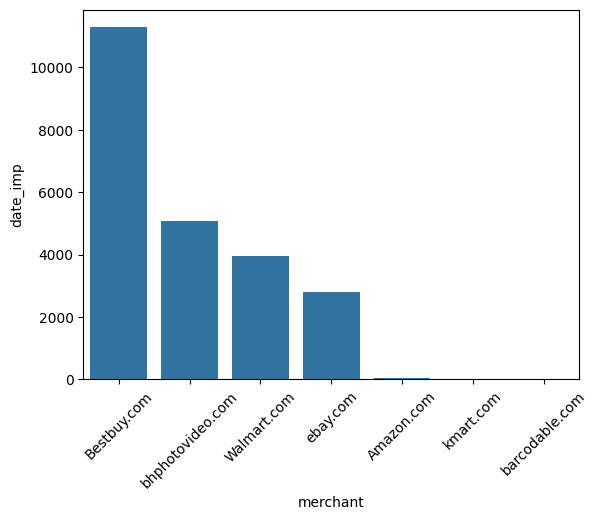

In [108]:
plt.xticks(rotation = 45)
sns.barplot( x = 'merchant', y = 'date_imp', data = aux1)

In [109]:
# Filtro de lojas
# seleção de lojas
df_best = df2[df2['merchant'] == 'Bestbuy.com']
df_bhp = df2[df2['merchant'] == 'bhphotovideo.com']
df_walmart = df2[df2['merchant'] == 'Walmart.com']
df_ebay = df2[df2['merchant'] == 'ebay.com']

### 3.1.1 Qual a categoria de produto mais vendida ?

In [110]:
aux = (df3.loc[:, ['date_imp_d', 'category_name']].groupby(['category_name']).count().
      sort_values('date_imp_d', ascending =  False))
aux.head()

,date_imp_d
category_name,
"tv, television, video",2130
"laptop, computer",1715
"speaker, portable, bluetooth",1104
"camera, mirrorless, photo",1072
"car, speaker, subwoofer",865


<Axes: xlabel='category_name', ylabel='date_imp_d'>

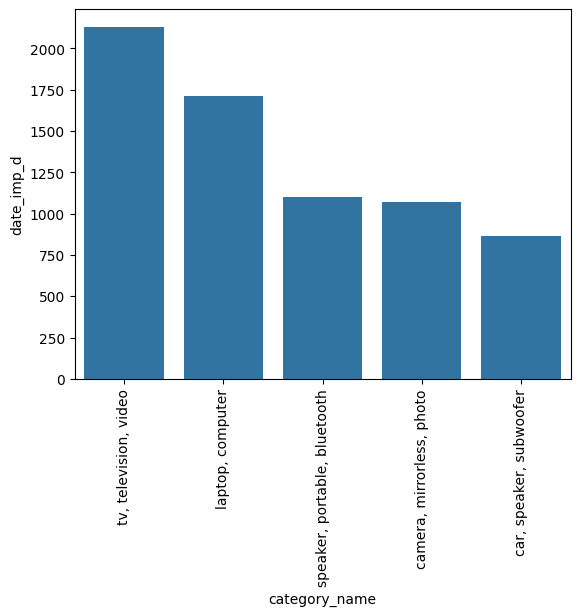

In [111]:
aux.reset_index(drop = True)
plt.xticks(rotation = 90)
sns.barplot(x = 'category_name', y = 'date_imp_d', data= aux.head())

### 3.1.2 As categorias mais vendidas por loja



In [112]:
aux = df3.loc[:,['date_imp_d', 'category_name', 'merchant']].groupby(['category_name', 'merchant']).count().sort_values('date_imp_d', ascending = False )
aux.head()

,,date_imp_d
category_name,merchant,
"laptop, computer",Bestbuy.com,1071
"tv, television, video",ebay.com,820
"speaker, portable, bluetooth",Bestbuy.com,758
"camera, mirrorless, photo",bhphotovideo.com,556
"car, speaker, subwoofer",Bestbuy.com,553


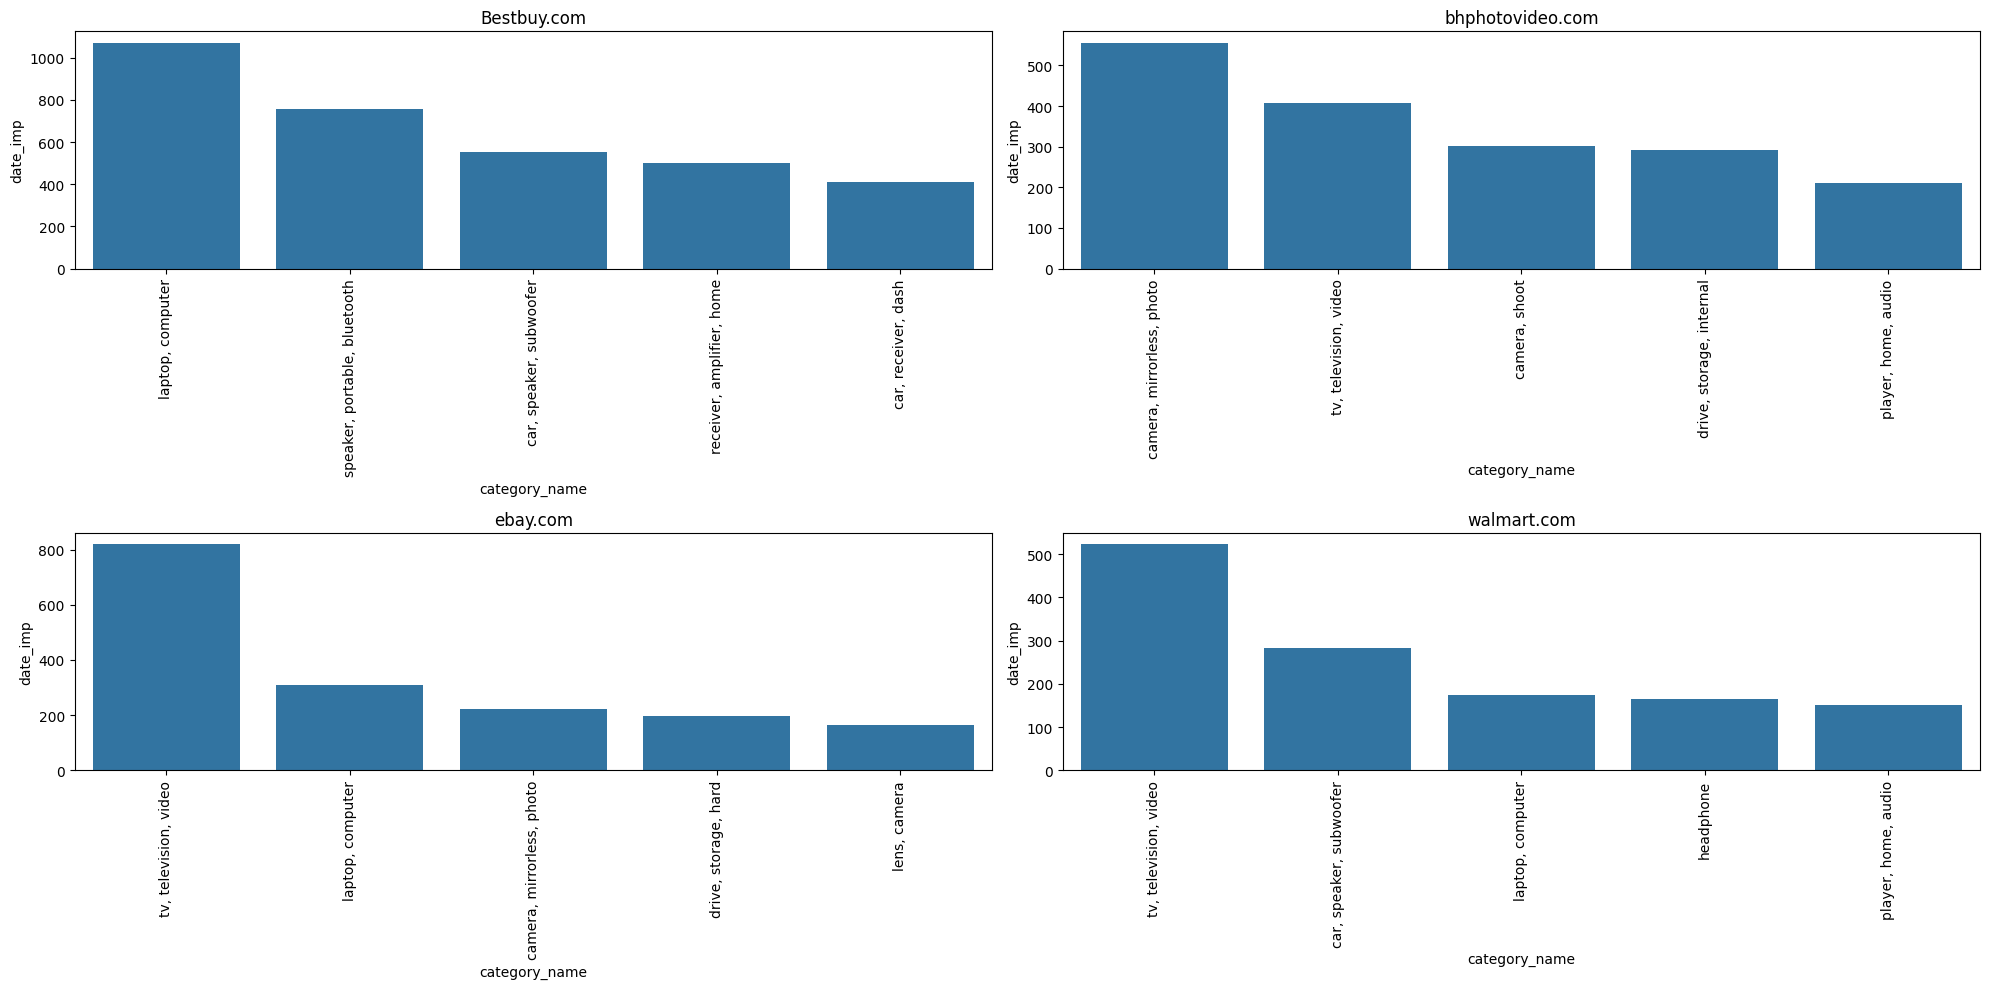

In [113]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
aux3 = (
    df_best[["date_imp", "category_name"]]
    .groupby("category_name")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('Bestbuy.com')
sns.barplot(x='category_name', y='date_imp', data=aux3.head())


plt.subplot(2,2,2)
aux4 = (
    df_bhp[["date_imp", "category_name"]]
    .groupby("category_name")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('bhphotovideo.com')
sns.barplot(x='category_name', y='date_imp', data=aux4.head())


plt.subplot(2,2,3)
aux5 = (
    df_ebay[["date_imp", "category_name"]]
    .groupby("category_name")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('ebay.com')
sns.barplot(x='category_name', y='date_imp', data=aux5.head())

plt.subplot(2,2,4)
aux6 = (
    df_walmart[["date_imp", "category_name"]]
    .groupby("category_name")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('walmart.com')
sns.barplot(x='category_name', y='date_imp', data=aux6.head())

plt.tight_layout()


## 3.2 Qual a marca mais vendida ?



### 3.2.1 No Geral ?

In [114]:
aux = df3.loc[:,['date_imp_d', 'brand']].groupby('brand').count().sort_values(by = 'date_imp_d', ascending = False )
aux.head()

,date_imp_d
brand,
Sony,3205
Samsung,1924
Apple,1771
Yamaha,721
Pioneer,559


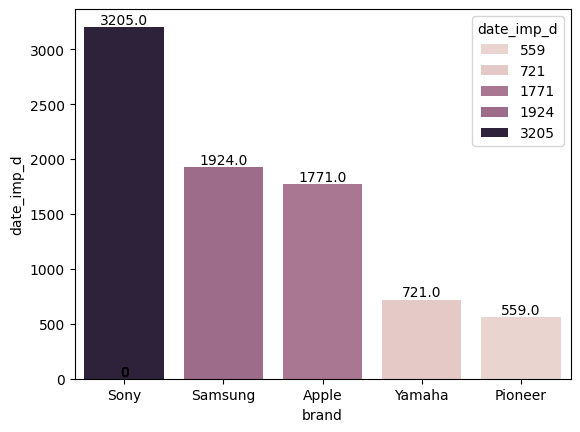

In [115]:
ax = sns.barplot( x = 'brand', y = 'date_imp_d', hue='date_imp_d' , data = aux.head())

# Adicionando valores em cima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

# Exibir o gráfico
plt.show()

### 3.2.2 Por loja?

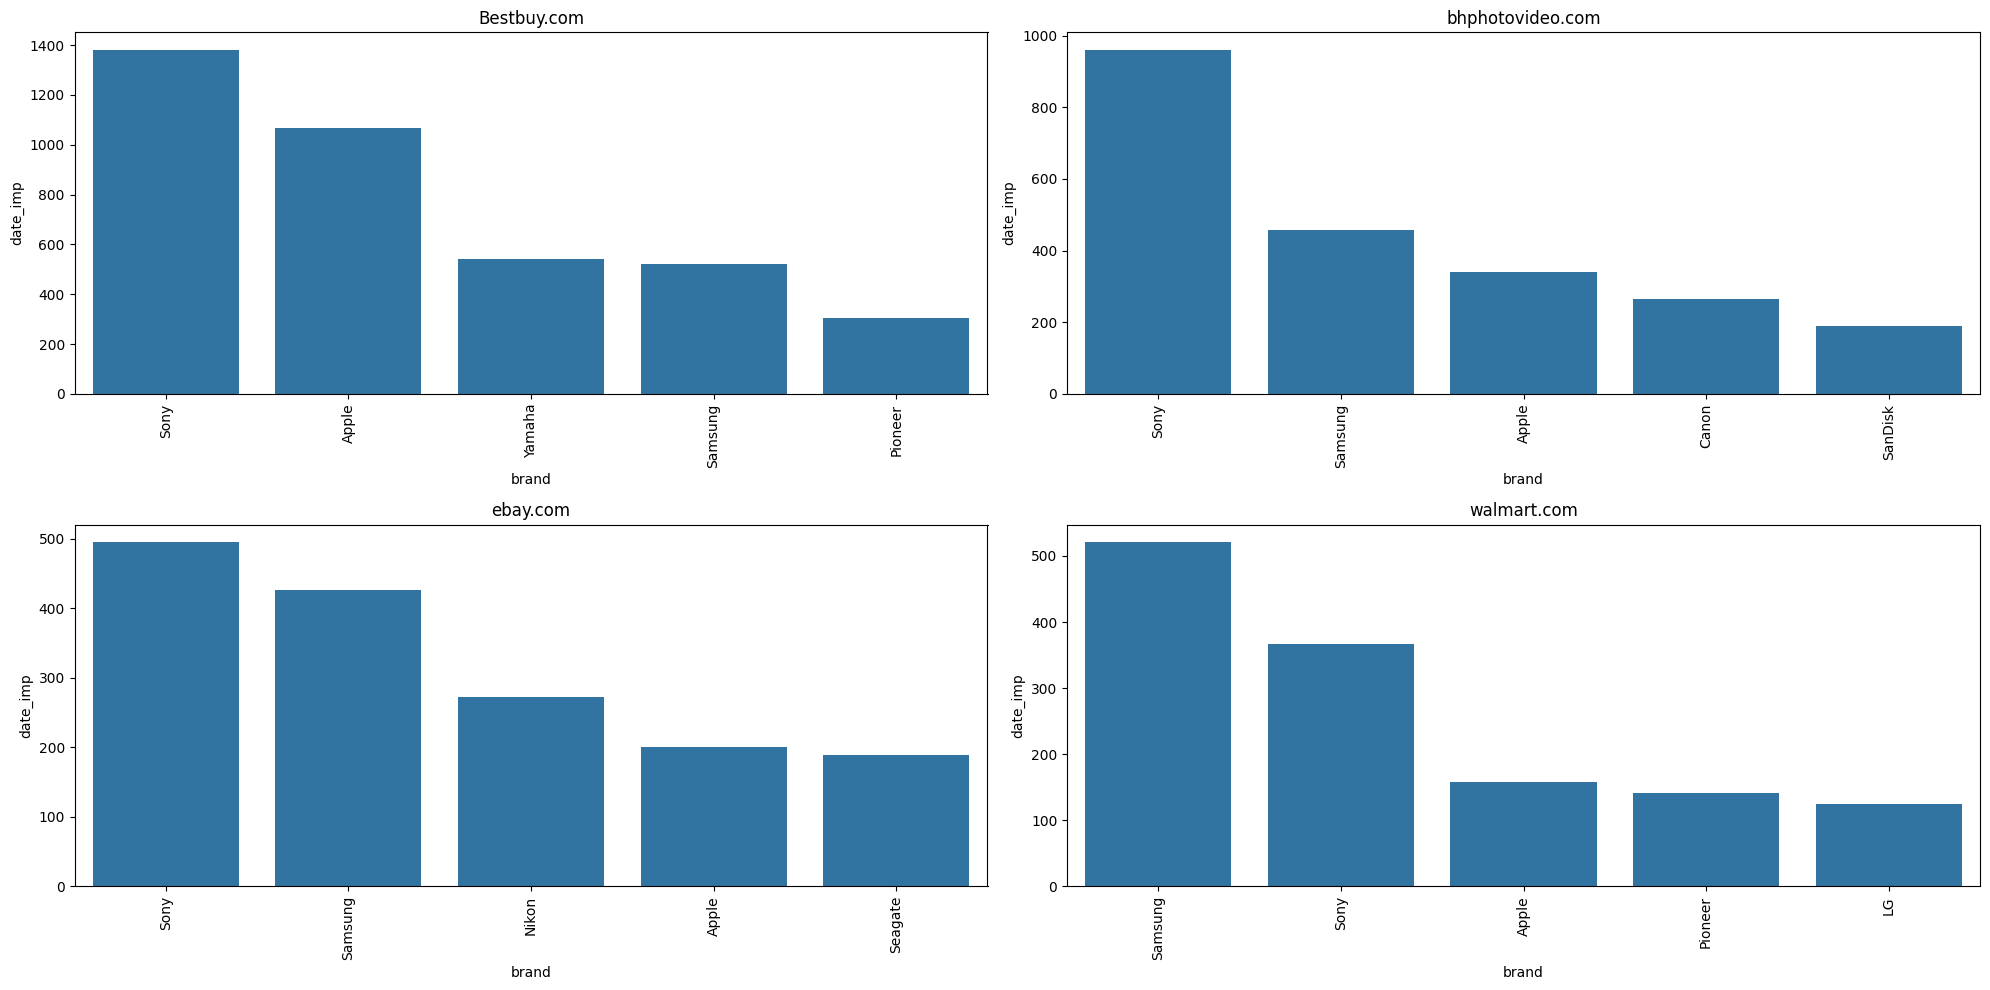

In [116]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
aux3 = (
    df_best[["date_imp", "brand"]]
    .groupby("brand")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('Bestbuy.com')
sns.barplot(x='brand', y='date_imp', data=aux3.head())


plt.subplot(2,2,2)
aux4 = (
    df_bhp[["date_imp", "brand"]]
    .groupby("brand")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('bhphotovideo.com')
sns.barplot(x='brand', y='date_imp', data=aux4.head())


plt.subplot(2,2,3)
aux5 = (
    df_ebay[["date_imp", "brand"]]
    .groupby("brand")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('ebay.com')
sns.barplot(x='brand', y='date_imp', data=aux5.head())

plt.subplot(2,2,4)
aux6 = (
    df_walmart[["date_imp", "brand"]]
    .groupby("brand")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('walmart.com')
sns.barplot(x='brand', y='date_imp', data=aux6.head())

plt.tight_layout()

## 3.3 Quais dias da semana que mais vende por lojas

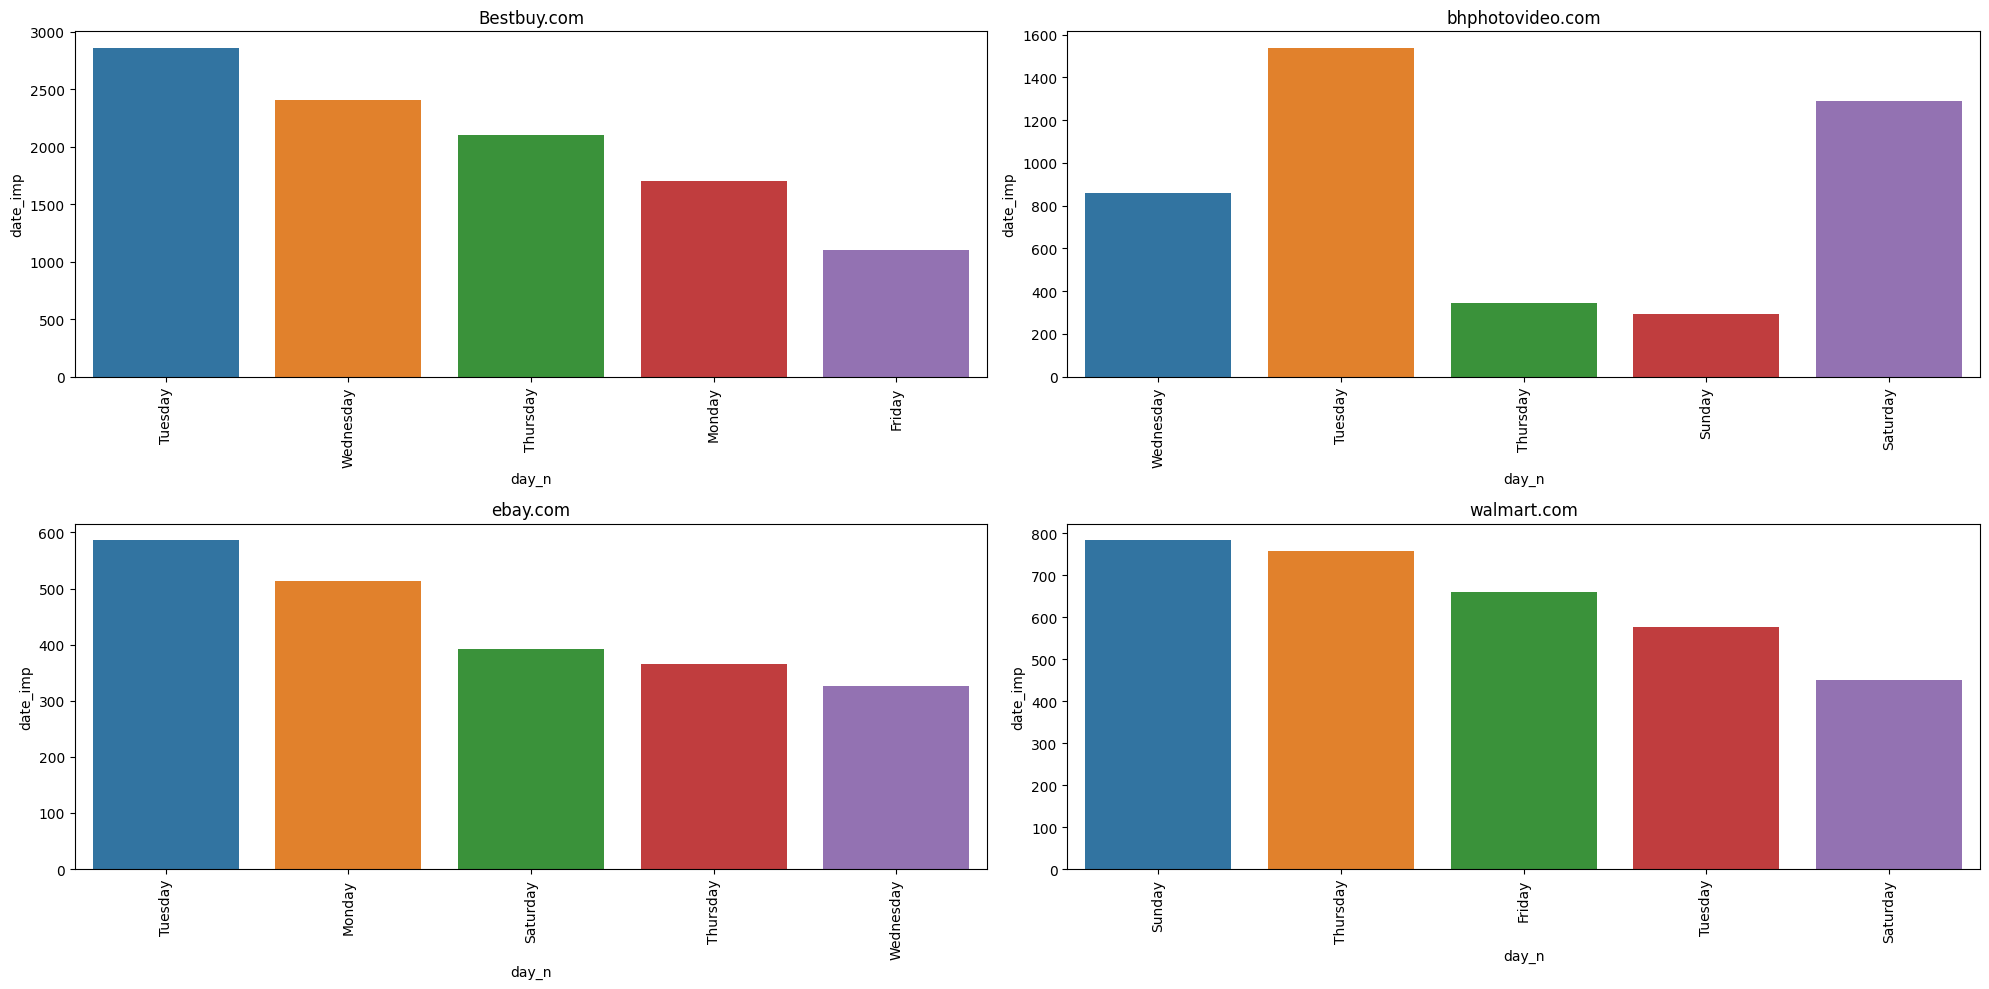

In [117]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
aux3 = (
    df_best[["date_imp", "day_n"]]
    .groupby("day_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('Bestbuy.com')
ax = sns.barplot(x='day_n', y='date_imp',hue = 'day_n', data=aux3.head())

#--------------

#_----------------------------
plt.subplot(2,2,2)
aux4 = (
    df_bhp[["date_imp", "day_n"]]
    .groupby("day_n")
    .count()
    .reset_index()
    .sort_values(by="day_n", ascending=False)

)
plt.xticks(rotation=90)
plt.title('bhphotovideo.com')
sns.barplot(x='day_n', y='date_imp',hue = 'day_n', data=aux4.head())


plt.subplot(2,2,3)
aux5 = (
    df_ebay[["date_imp", "day_n"]]
    .groupby("day_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('ebay.com')
sns.barplot(x='day_n', y='date_imp',hue = 'day_n', data=aux5.head())

plt.subplot(2,2,4)
aux6 = (
    df_walmart[["date_imp", "day_n"]]
    .groupby("day_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('walmart.com')
sns.barplot(x='day_n', y='date_imp',hue = 'day_n', data=aux6.head())

plt.tight_layout()

## 3.4 Quais os meses que mais vendem ?

### 3.4.1 No geral ?

In [118]:
aux = df3.loc[:,['date_imp', 'month_n']].groupby('month_n').count().sort_values(by = 'date_imp', ascending = False)
aux.head()
aux.reset_index()

,month_n,date_imp
0,August,5004
1,July,4116
2,March,2517
3,December,2474
4,May,2127
5,September,1977
6,October,1859
7,June,1448
8,November,1264
9,April,357


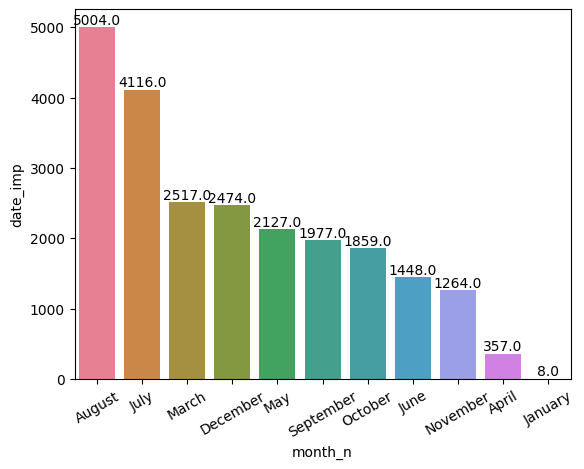

In [119]:

ax = sns.barplot( x ='month_n', y = 'date_imp',hue = 'month_n', data = aux )
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.xticks(rotation = 30)
# Exibir o gráfico
plt.show()

### 3.4.2 Por loja

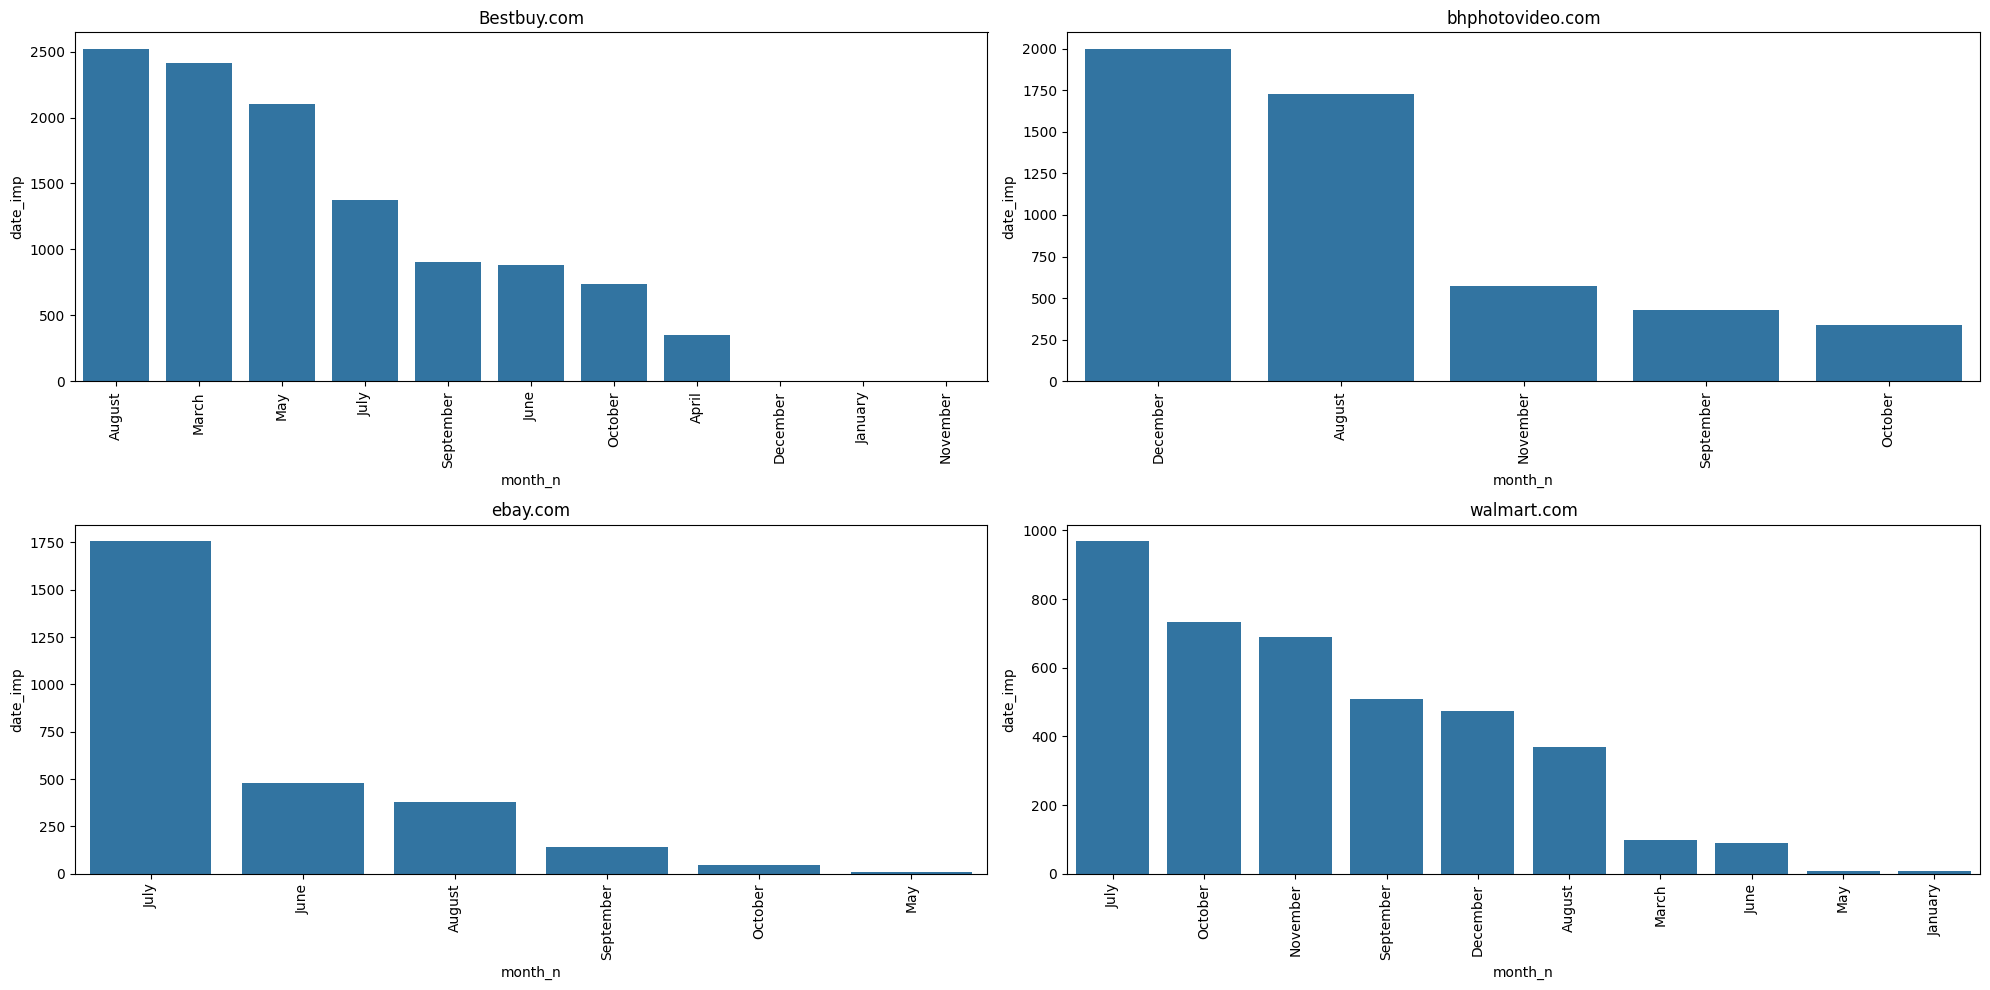

In [120]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
aux18 = (
    df_best[["date_imp", "month_n"]]
    .groupby("month_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('Bestbuy.com')
sns.barplot(x='month_n', y='date_imp', data=aux18)


plt.subplot(2,2,2)
aux19 = (
    df_bhp[["date_imp", "month_n"]]
    .groupby("month_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('bhphotovideo.com')
sns.barplot(x='month_n', y='date_imp', data=aux19)


plt.subplot(2,2,3)
aux20 = (
    df_ebay[["date_imp", "month_n"]]
    .groupby("month_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('ebay.com')
sns.barplot(x='month_n', y='date_imp', data=aux20)

plt.subplot(2,2,4)
aux21 = (
    df_walmart[["date_imp", "month_n"]]
    .groupby("month_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('walmart.com')
sns.barplot(x='month_n', y='date_imp', data=aux21)

plt.tight_layout()

## 3.5 Quais as semanas que mais vendem?

### 3.5.1 No geral

In [121]:
aux = df3.loc[:,['date_imp', 'week_number']].groupby('week_number').count().sort_values(by = 'date_imp', ascending = False)
aux.head()
aux.reset_index()

,week_number,date_imp
0,49,2330
1,35,1680
2,30,1539
3,31,1356
4,22,1140
5,29,1102
6,34,1088
7,9,893
8,33,811
9,38,799


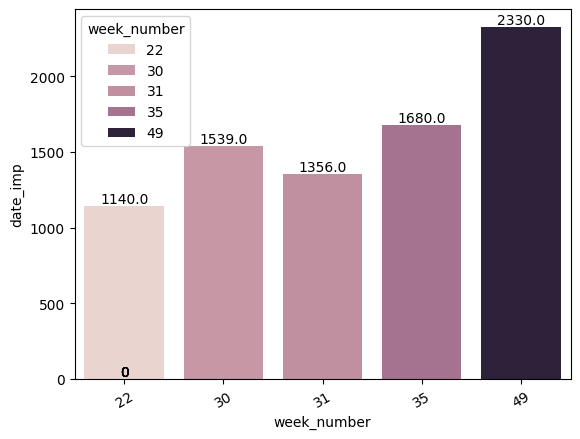

In [122]:
ax = sns.barplot( x ='week_number', y = 'date_imp',hue = 'week_number', data = aux.head() )
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.xticks(rotation = 30)
# Exibir o gráfico
plt.show()

### 3.5.2 Por loja

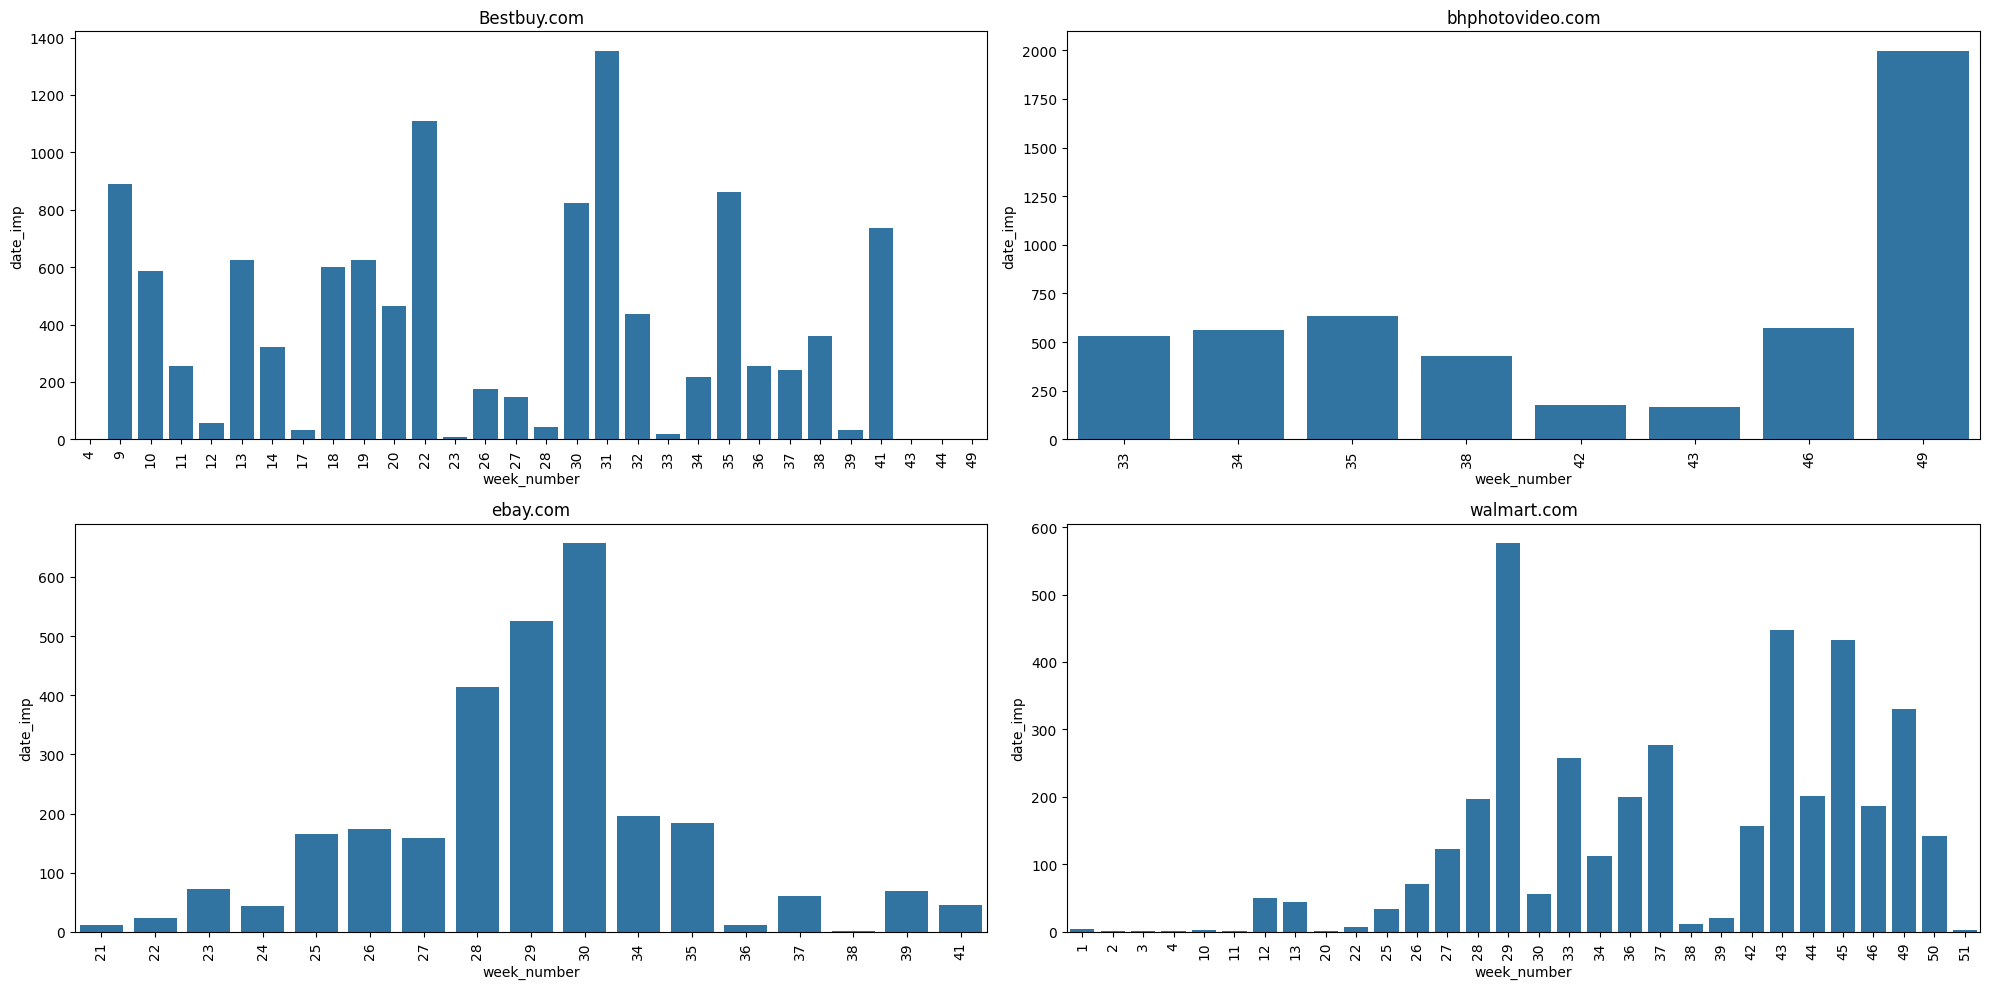

In [123]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
aux23 = (
    df_best[["date_imp", "week_number"]]
    .groupby("week_number")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('Bestbuy.com')
sns.barplot(x='week_number', y='date_imp', data=aux23)


plt.subplot(2,2,2)
aux24 = (
    df_bhp[["date_imp", "week_number"]]
    .groupby("week_number")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('bhphotovideo.com')
sns.barplot(x='week_number', y='date_imp', data=aux24)


plt.subplot(2,2,3)
aux25 = (
    df_ebay[["date_imp", "week_number"]]
    .groupby("week_number")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('ebay.com')
sns.barplot(x='week_number', y='date_imp', data=aux25)

plt.subplot(2,2,4)
aux26 = (
    df_walmart[["date_imp", "week_number"]]
    .groupby("week_number")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('walmart.com')
sns.barplot(x='week_number', y='date_imp', data=aux26)

plt.tight_layout()

# 4.0 Feature Engineering

In [124]:
df4 = df3.copy()

## 4.1 Categoria mais vendida da Bestbuy

In [125]:
df_best.loc[:,['date_imp', 'category_name']].groupby(['category_name']).count().sort_values(by='date_imp', ascending = False )

,date_imp
category_name,
"laptop, computer",1071
"speaker, portable, bluetooth",758
"car, speaker, subwoofer",553
"receiver, amplifier, home",500
"car, receiver, dash",411
"tv, television, video",379
"ipod, player",355
"speaker, audio, home",336
"headphone, earbud, ear",331


In [126]:
# Categoria mais vendida no Bestbuy
df_laptop = df_best[df_best['category_name'] == 'speaker, portable, bluetooth'] 

In [127]:
df_laptop.isnull().sum()

date_imp           0
date_imp_d         0
cluster            0
category_name      0
name               0
price              0
disc_price         0
merchant           0
disc_percentage    0
is_sale            0
imp_count          0
brand              0
p_description      0
currency           0
date_added         0
date_seen          0
date_updated       0
weight             0
date_imp_d.1       0
day_n              0
month              0
month_n            0
day                0
week_number        0
price_std          0
Hours              0
dtype: int64

In [128]:
dataset = ( df_laptop.groupby(['name', 'week_number'  ]).
           agg({'disc_price':'mean', 'date_imp':'count'}).
           reset_index() )
dataset

,name,week_number,disc_price,date_imp
0,BOOM 2 Wireless Bluetooth Speaker - Indigo,9,199.99,1
1,BOOM 2 Wireless Bluetooth Speaker - Indigo,10,149.99,2
2,BOOM 2 Wireless Bluetooth Speaker - Indigo,13,199.99,1
3,BOOM 2 Wireless Bluetooth Speaker - Indigo,18,199.99,1
4,BOOM 2 Wireless Bluetooth Speaker - Indigo,19,129.99,1
...,...,...,...,...
496,iPL24 FM Clock Radio with Lightning Dock and U...,30,69.99,1
497,iPL24 FM Clock Radio with Lightning Dock and U...,31,69.99,1
498,iPL24 FM Clock Radio with Lightning Dock and U...,32,69.99,1
499,iPL24 FM Clock Radio with Lightning Dock and U...,35,69.99,1


In [129]:
# criando dataframe dos valores
x_price = dataset.pivot( index = 'week_number', columns = 'name', values = 'disc_price')

x_price = pd.DataFrame( x_price.to_records())
# x_price

In [130]:
y_demand = dataset.pivot(index = 'week_number', columns = 'name', values = 'date_imp')
y_demand = pd.DataFrame( y_demand.to_records())

# 5.0 Descrição dos novos dataframes

## 5.1 Data Dimension

In [131]:
print(f'Number of rows:{x_price.shape[0]}')
print(f'Number of columns:{x_price.shape[1]}')


Number of rows:23
Number of columns:42


In [132]:
print(f'Number of rows:{y_demand.shape[0]}')
print(f'Number of columns:{y_demand.shape[1]}')

Number of rows:23
Number of columns:42


## 5.2 Data Types

In [133]:
x_price.dtypes

week_number                                                                                                                    int64
BOOM 2 Wireless Bluetooth Speaker - Indigo                                                                                   float64
BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - Black    float64
BoseÂ® - SoundlinkÂ® Color Bluetooth Speaker II - Coral Red                                                                  float64
Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond                                                                  float64
Braven BRV-BLADE Wireless Portable Bluetooth Speaker [22 Hour Playtime][Waterproof] 4000 mAh Power Bank Charger - Black      float64
Chant Mini Portable Bluetooth Wireless Speaker (Navy)                                                                        float64
Chant Sport BT Portable Audio System (Black)                         

In [134]:
y_demand.dtypes

week_number                                                                                                                    int64
BOOM 2 Wireless Bluetooth Speaker - Indigo                                                                                   float64
BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - Black    float64
BoseÂ® - SoundlinkÂ® Color Bluetooth Speaker II - Coral Red                                                                  float64
Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond                                                                  float64
Braven BRV-BLADE Wireless Portable Bluetooth Speaker [22 Hour Playtime][Waterproof] 4000 mAh Power Bank Charger - Black      float64
Chant Mini Portable Bluetooth Wireless Speaker (Navy)                                                                        float64
Chant Sport BT Portable Audio System (Black)                         

## 5.3 Check NA

In [135]:
x_price.head()

,week_number,BOOM 2 Wireless Bluetooth Speaker - Indigo,BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - Black,BoseÂ® - SoundlinkÂ® Color Bluetooth Speaker II - Coral Red,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Braven BRV-BLADE Wireless Portable Bluetooth Speaker [22 Hour Playtime][Waterproof] 4000 mAh Power Bank Charger - Black,Chant Mini Portable Bluetooth Wireless Speaker (Navy),Chant Sport BT Portable Audio System (Black),Details About Logitech Ue Roll 2 Wireless Portable Bluetooth Waterproof Speaker,"DreamWave - Tremor Portable Bluetooth Speaker - Green,Black",...,Sony - XB20 Portable Bluetooth Speaker - Blue,Sony - XB7 Extra Bass Audio System with Bluetooth - Black,Sony SRSHG1/BLK Hi-Res Wireless Speaker- Charcoal black,Sony SRSXB3/BLK Portable Wireless Speaker with Bluetooth (Black),Sony Ultra-Portable Bluetooth Speaker,Tough Portable Bluetooth Speaker (Black and Silver),h.ear go Wireless Speaker (Lime Yellow),iHome Rechargeable Splash Proof Stereo Bluetooth Speaker - Black (IBT33BC),iLive - ISBW216 Wireless Gnome Outdoor Speaker - Multi,iPL24 FM Clock Radio with Lightning Dock and USB Port (Gunmetal)
0,9,199.99,179.99,129.99,64.99,139.99,47.99,99.99,NaN,290.99,...,NaN,187.99,149.99,149.99,49.99,229.99,199.99,32.99,33.99,46.99
1,10,149.99,129.99,129.99,64.99,99.99,47.99,99.99,NaN,290.99,...,NaN,187.99,149.99,99.99,48.99,229.99,199.99,32.99,33.99,45.99
2,11,NaN,129.99,129.99,NaN,99.99,47.99,99.99,NaN,290.99,...,NaN,NaN,149.99,99.99,48.99,229.99,199.99,32.99,33.99,NaN
3,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.99,NaN,149.99,NaN,NaN,NaN,199.99,NaN,NaN,NaN
4,13,199.99,103.99,129.99,64.99,79.99,47.99,99.99,NaN,290.99,...,99.99,218.49,149.99,99.99,49.99,146.99,199.99,49.99,33.99,69.99


In [136]:
y_demand.head()

,week_number,BOOM 2 Wireless Bluetooth Speaker - Indigo,BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - Black,BoseÂ® - SoundlinkÂ® Color Bluetooth Speaker II - Coral Red,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Braven BRV-BLADE Wireless Portable Bluetooth Speaker [22 Hour Playtime][Waterproof] 4000 mAh Power Bank Charger - Black,Chant Mini Portable Bluetooth Wireless Speaker (Navy),Chant Sport BT Portable Audio System (Black),Details About Logitech Ue Roll 2 Wireless Portable Bluetooth Waterproof Speaker,"DreamWave - Tremor Portable Bluetooth Speaker - Green,Black",...,Sony - XB20 Portable Bluetooth Speaker - Blue,Sony - XB7 Extra Bass Audio System with Bluetooth - Black,Sony SRSHG1/BLK Hi-Res Wireless Speaker- Charcoal black,Sony SRSXB3/BLK Portable Wireless Speaker with Bluetooth (Black),Sony Ultra-Portable Bluetooth Speaker,Tough Portable Bluetooth Speaker (Black and Silver),h.ear go Wireless Speaker (Lime Yellow),iHome Rechargeable Splash Proof Stereo Bluetooth Speaker - Black (IBT33BC),iLive - ISBW216 Wireless Gnome Outdoor Speaker - Multi,iPL24 FM Clock Radio with Lightning Dock and USB Port (Gunmetal)
0,9,1.0,1.0,3.0,2.0,1.0,1.0,1.0,NaN,1.0,...,NaN,4.0,2.0,3.0,3.0,1.0,1.0,1.0,1.0,2.0
1,10,2.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,1.0,...,NaN,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
2,11,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
3,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,13,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,1.0,...,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0


In [137]:
x_price.isnull().sum()

week_number                                                                                                                   0
BOOM 2 Wireless Bluetooth Speaker - Indigo                                                                                   12
BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - Black    19
BoseÂ® - SoundlinkÂ® Color Bluetooth Speaker II - Coral Red                                                                   8
Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond                                                                  10
Braven BRV-BLADE Wireless Portable Bluetooth Speaker [22 Hour Playtime][Waterproof] 4000 mAh Power Bank Charger - Black      19
Chant Mini Portable Bluetooth Wireless Speaker (Navy)                                                                        10
Chant Sport BT Portable Audio System (Black)                                                            

## 5.4 Replace NAN

In [138]:
# A função round() do Python arredonda números de ponto flutuante para um número específico de casas decimais
price_median = np.round( x_price.median(),2)
x_price.fillna( price_median, inplace = True)
x_price.head()

,week_number,BOOM 2 Wireless Bluetooth Speaker - Indigo,BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - Black,BoseÂ® - SoundlinkÂ® Color Bluetooth Speaker II - Coral Red,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Braven BRV-BLADE Wireless Portable Bluetooth Speaker [22 Hour Playtime][Waterproof] 4000 mAh Power Bank Charger - Black,Chant Mini Portable Bluetooth Wireless Speaker (Navy),Chant Sport BT Portable Audio System (Black),Details About Logitech Ue Roll 2 Wireless Portable Bluetooth Waterproof Speaker,"DreamWave - Tremor Portable Bluetooth Speaker - Green,Black",...,Sony - XB20 Portable Bluetooth Speaker - Blue,Sony - XB7 Extra Bass Audio System with Bluetooth - Black,Sony SRSHG1/BLK Hi-Res Wireless Speaker- Charcoal black,Sony SRSXB3/BLK Portable Wireless Speaker with Bluetooth (Black),Sony Ultra-Portable Bluetooth Speaker,Tough Portable Bluetooth Speaker (Black and Silver),h.ear go Wireless Speaker (Lime Yellow),iHome Rechargeable Splash Proof Stereo Bluetooth Speaker - Black (IBT33BC),iLive - ISBW216 Wireless Gnome Outdoor Speaker - Multi,iPL24 FM Clock Radio with Lightning Dock and USB Port (Gunmetal)
0,9,199.99,179.99,129.99,64.99,139.99,47.99,99.99,99.99,290.99,...,79.99,187.99,149.99,149.99,49.99,229.99,199.99,32.99,33.99,46.99
1,10,149.99,129.99,129.99,64.99,99.99,47.99,99.99,99.99,290.99,...,79.99,187.99,149.99,99.99,48.99,229.99,199.99,32.99,33.99,45.99
2,11,199.99,129.99,129.99,64.99,99.99,47.99,99.99,99.99,290.99,...,79.99,255.49,149.99,99.99,48.99,229.99,199.99,32.99,33.99,69.99
3,12,199.99,129.99,129.99,64.99,99.99,41.99,78.49,99.99,290.99,...,99.99,255.49,149.99,149.99,66.49,146.99,199.99,37.99,33.99,69.99
4,13,199.99,103.99,129.99,64.99,79.99,47.99,99.99,99.99,290.99,...,99.99,218.49,149.99,99.99,49.99,146.99,199.99,49.99,33.99,69.99


In [139]:
y_demand.fillna(0, inplace = True)
y_demand.head()

,week_number,BOOM 2 Wireless Bluetooth Speaker - Indigo,BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - Black,BoseÂ® - SoundlinkÂ® Color Bluetooth Speaker II - Coral Red,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Braven BRV-BLADE Wireless Portable Bluetooth Speaker [22 Hour Playtime][Waterproof] 4000 mAh Power Bank Charger - Black,Chant Mini Portable Bluetooth Wireless Speaker (Navy),Chant Sport BT Portable Audio System (Black),Details About Logitech Ue Roll 2 Wireless Portable Bluetooth Waterproof Speaker,"DreamWave - Tremor Portable Bluetooth Speaker - Green,Black",...,Sony - XB20 Portable Bluetooth Speaker - Blue,Sony - XB7 Extra Bass Audio System with Bluetooth - Black,Sony SRSHG1/BLK Hi-Res Wireless Speaker- Charcoal black,Sony SRSXB3/BLK Portable Wireless Speaker with Bluetooth (Black),Sony Ultra-Portable Bluetooth Speaker,Tough Portable Bluetooth Speaker (Black and Silver),h.ear go Wireless Speaker (Lime Yellow),iHome Rechargeable Splash Proof Stereo Bluetooth Speaker - Black (IBT33BC),iLive - ISBW216 Wireless Gnome Outdoor Speaker - Multi,iPL24 FM Clock Radio with Lightning Dock and USB Port (Gunmetal)
0,9,1.0,1.0,3.0,2.0,1.0,1.0,1.0,0.0,1.0,...,0.0,4.0,2.0,3.0,3.0,1.0,1.0,1.0,1.0,2.0
1,10,2.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
2,11,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0


## 5.6 Descriptive Statistics

In [140]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(x_price.apply(np.mean)).T
ct2 = pd.DataFrame(x_price.apply(np.median)).T

# Dispersion - sdt, min, max, range, skew, kurtosis

d1 = pd.DataFrame( x_price.apply(np.std)).T
d2 = pd.DataFrame( x_price.apply(np.min)).T
d3 = pd.DataFrame( x_price.apply(np.max)).T
d4 = pd.DataFrame( x_price.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame( x_price.apply(lambda x: x.skew())).T
d6 = pd.DataFrame( x_price.apply(lambda x: x.kurtosis())).T

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,week_number,9.00,41.00,32.00,24.826087,26.00,10.374099,-0.036892,-1.499963
1,BOOM 2 Wireless Bluetooth Speaker - Indigo,129.99,199.99,70.00,189.555217,199.99,21.157435,-1.856673,2.042462
2,BRAVEN BRV-HD Wireless Bluetooth Speaker [28 H...,103.99,179.99,76.00,131.033478,129.99,11.704619,2.832777,14.829604
3,BoseÂ® - SoundlinkÂ® Color Bluetooth Speaker I...,116.99,129.99,13.00,129.424783,129.99,2.651105,-4.795832,23.000000
4,Boytone - 2500W 2.1-Ch. Home Theater System - ...,64.99,69.99,5.00,65.337826,64.99,1.087826,3.785403,15.134999
5,Braven BRV-BLADE Wireless Portable Bluetooth S...,79.99,139.99,60.00,100.859565,99.99,9.284416,2.956909,15.184672
6,Chant Mini Portable Bluetooth Wireless Speaker...,39.99,49.99,10.00,43.337826,41.99,3.265214,1.087841,-0.430518
7,Chant Sport BT Portable Audio System (Black),65.99,99.99,34.00,79.055217,78.49,10.997336,0.816480,0.067231
8,Details About Logitech Ue Roll 2 Wireless Port...,69.99,99.99,30.00,98.685652,99.99,6.117934,-4.795832,23.000000
9,DreamWave - Tremor Portable Bluetooth Speaker ...,279.99,290.99,11.00,290.381304,290.99,2.240713,-4.627941,21.829549


In [73]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(y_demand.apply(np.mean)).T
ct2 = pd.DataFrame(y_demand.apply(np.median)).T

# Dispersion - sdt, min, max, range, skew, kurtosis

d1 = pd.DataFrame( y_demand.apply(np.std)).T
d2 = pd.DataFrame( y_demand.apply(np.min)).T
d3 = pd.DataFrame( y_demand.apply(np.max)).T
d4 = pd.DataFrame( y_demand.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame( y_demand.apply(lambda x: x.skew())).T
d6 = pd.DataFrame( y_demand.apply(lambda x: x.kurtosis())).T

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']

# 5.0 EDA 

In [150]:
#plt.figure(figsize=(30,10))
#plt.subplot(2,1,1)
aux1 = pd.DataFrame(x_price.apply(lambda x: x.median())).reset_index()
aux1.columns = ['products', 'price']
aux1.head()
#plt.xticks(rotation = 35)
#sns.barplot(x='products', y ='price', data=aux1.head())


,products,price
0,week_number,26.00
1,BOOM 2 Wireless Bluetooth Speaker - Indigo,199.99
2,BRAVEN BRV-HD Wireless Bluetooth Speaker [28 H...,129.99
3,BoseÂ® - SoundlinkÂ® Color Bluetooth Speaker I...,129.99
4,Boytone - 2500W 2.1-Ch. Home Theater System - ...,64.99


In [152]:


#plt.subplot(2,1,2)
aux2 = pd.DataFrame(y_demand.apply(lambda x: x.sum())).reset_index()
aux2.columns = ['products', 'demand']
aux2.head()
#plt.xticks(rotation=90)
#sns.barplot(x='products', y='demand', data=aux2.head())


,products,demand
0,week_number,571.0
1,BOOM 2 Wireless Bluetooth Speaker - Indigo,16.0
2,BRAVEN BRV-HD Wireless Bluetooth Speaker [28 H...,4.0
3,BoseÂ® - SoundlinkÂ® Color Bluetooth Speaker I...,21.0
4,Boytone - 2500W 2.1-Ch. Home Theater System - ...,15.0


In [155]:
len(x_price.columns)

42

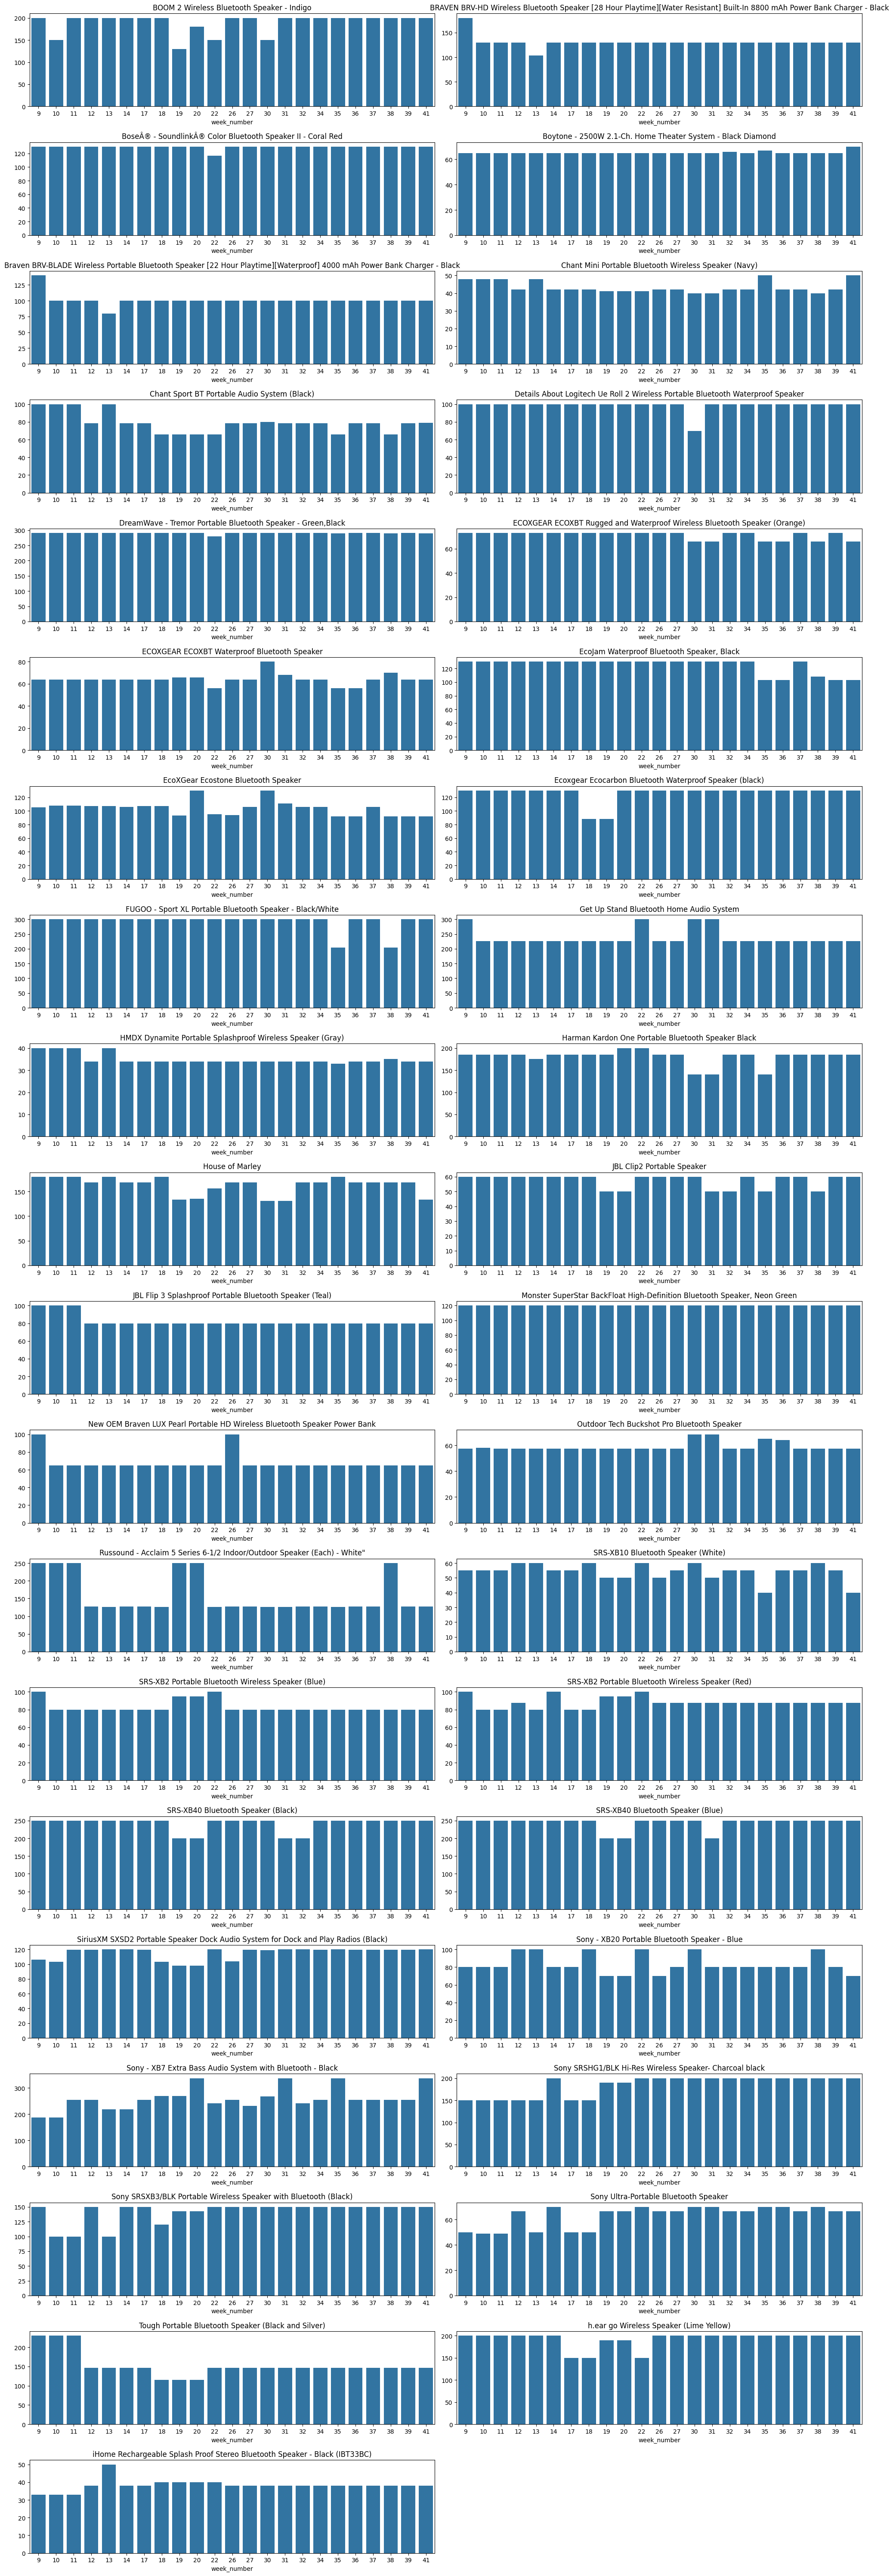

In [156]:
# observo a ditribuição de preço pela pelas semanas
# problema de limite 40 e len(x_price.columns) é 42
plt.figure(figsize=(20,60))
for k in np.arange(1, 40, 1):
    plt.subplot(20,2, k)
    sns.barplot(data=x_price, x=x_price['week_number'], y=x_price[x_price.columns[k]])
    plt.title(x_price.iloc[:,k].name)
    plt.ylabel('')
    plt.tight_layout()


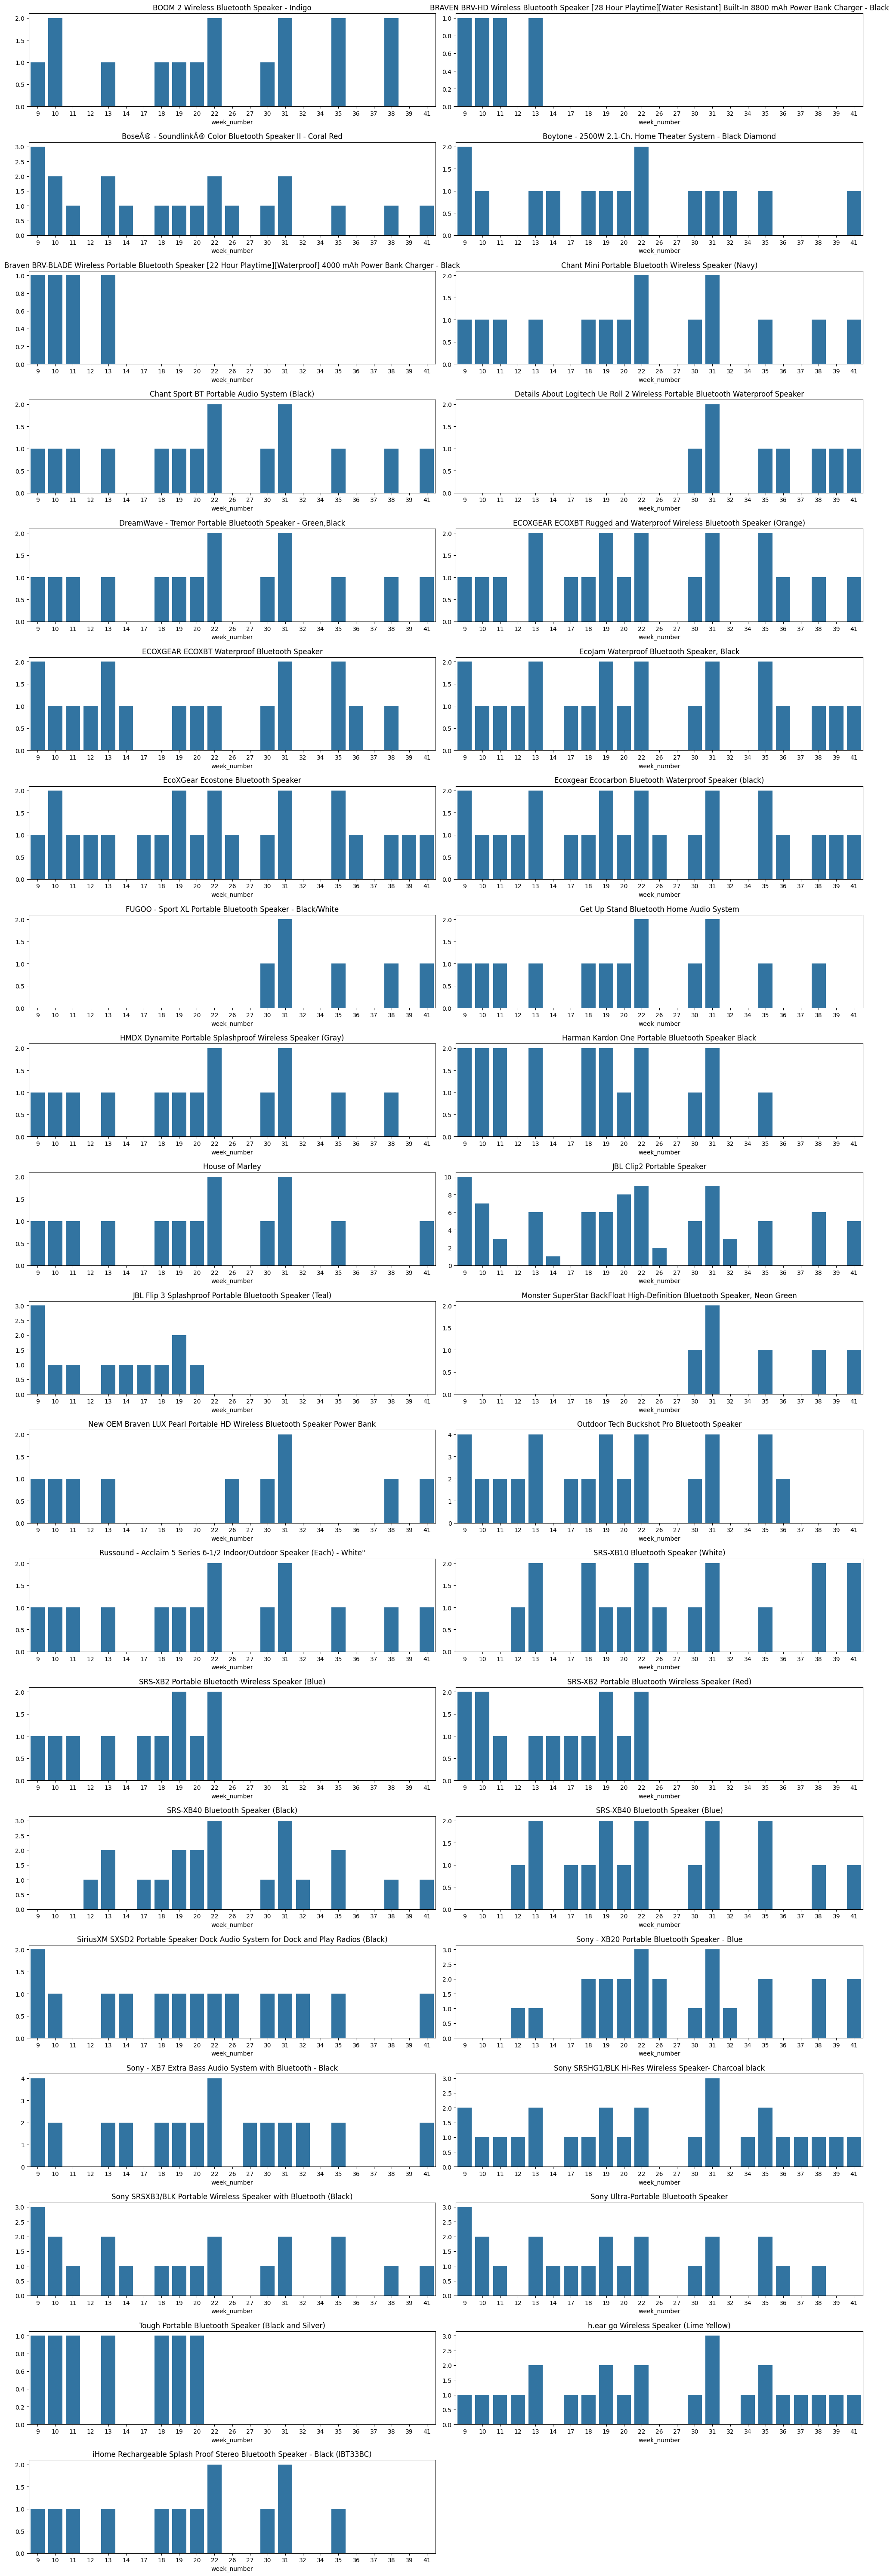

In [157]:
# observo a ditribuição de preço pela pelas semanas
# problema de limite 40 e len(x_price.columns) é 42
plt.figure(figsize=(20,60))
for k in np.arange(1, 40, 1):
    plt.subplot(20,2, k)
    sns.barplot(data=y_demand, x= y_demand['week_number'], y=y_demand[y_demand.columns[k]])
    plt.title(y_demand.iloc[:,k].name)
    plt.ylabel('')
    plt.tight_layout()


# 6.0 Machine Learning

## 6.1 BOOM 2 Wireless Bluetooth Speaker - Indigo

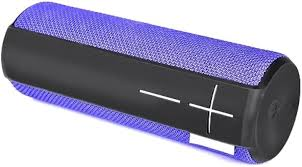

In [ ]:
#year


# Convertendo a coluna para o formato datetime
df3['invoice_date'] = pd.to_datetime(df3['invoice_date'])

# .dt para extrair o ano, M
df3['year'] = df3['invoice_date'].dt.year


# month
df3['month'] = df3['invoice_date'].dt.month

df3['month_sin'] = df3['month'].apply(lambda x: np.sin( x* (2. * np.pi/12) ) )
df3['month_cos'] = df3['month'].apply(lambda x: np.cos( x* (2. * np.pi/12) ) )

In [ ]:
df[df['description'].str.contains(',', na=False)]



**É importante resaltar o que já até aqui para mim ficou evidente. Primeiro, quando um item é cancelado a fatura tem a letra C e 
quantity é negativo. Segundo, e mais interressante, na coluna 'description' cada linha tem único pedido, mesmo quando há virgulas é 
uma descrição a mais, portanto, na coluna unit_price aquele preço se relaciona ao pedido descrito pela coluna 'description'.**

In [ ]:


#df3['gross_revenue'] = df3['quantity'].apply(lambda x: df3.loc[:,'quantity'] * df3.loc[:,'unit_price'] if x > 0 else 0)
# Observe que se produto retorna de algum lugar claro que tem um custo, mas não tenho informação para estimar,
#por isso ele é zero!

df3['gross_revenue'] = np.where(df3['quantity'] > 0, df3['quantity'] * df3['unit_price'], 0)

#df3['gross_revenue'] = np.where(df3['gross_revenue'] == 0, df3['quantity'] * df3['unit_price'] ) adicionar o valor do gasto ao pacote
#cancelado
df3['gross_revenue'].head()

**Conjunto New Features**

In [ ]:
# Cojunto New Features
purchases = df3[df3['quantity'] > 0]
#Monetary
df_monetary = purchases.loc[:, ['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_monetary 

In [ ]:
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')
df_ref

In [ ]:
df3['returned'] = np.where(df3['quantity'] < 0, 1, 0)

In [ ]:
df3.head()

In [ ]:
 df3.invoice_date.max()

**Conjunto New Features**

In [ ]:
# Conjunto New Features
filtro =  df3[df3['quantity'] > 0]
df_recency = filtro.loc[:,['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index() # pegando a maior data de cada cliente, que também em linha temporal é 
# mais recente
df_recency['recency_days'] =  (df3.invoice_date.max() - df_recency.invoice_date).dt.days
df_recency

In [ ]:
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')
df_ref

#O calculo será feito com referência a linha temporal dentro do dataset 
 Para calcular a diferença em dias entre uma data em seu conjunto de dados e a data atual, você pode seguir estes passos:


import pandas as pd
from datetime import datetime

#Defina a data presente
data_atual = pd.Timestamp.now()

#Data do conjunto de dados
data_do_dataset = pd.Timestamp('2017-12-07 00:00:00')

#Calcular a diferença em dias
diferenca_em_dias = (data_atual - data_do_dataset).days

print(f'A diferença em dias entre {data_do_dataset} e a data de hoje é de {diferenca_em_dias} dias.')




In [ ]:

#de cada cliente, que também em linha temporal é 
rel = ( df3.invoice_date.max() - df3.invoice_date) 
df3['recency_days'] = rel.dt.days


In [ ]:
df3.head()

In [ ]:
df3.isnull().sum()

In [ ]:
#df_aux = df2[['customer_id', 'invoice_date']].drop_duplicates().sort_values( ['customer_id', 'invoice_date'], ascending=['False', 'False'] )
#df_aux['next_customer_id'] = df_aux['customer_id'].shift()

In [ ]:
df3.shape

In [ ]:
# Quantidade de vezes que o cliente realizou a compra
df_freq = filtro.loc[:, ['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns = { 'invoice_no': 'qtde_invoices'})
df_ref = pd.merge( df_ref, df_freq, on = 'customer_id', how = 'left')
df_ref

In [ ]:
df_freq = filtro.loc[:, ['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns={'invoice_no':'qtde_invoices'})
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')

Parece haver um erro na lógica, para calcular a quantidade de vezes que o cliente comprou e selecionando somente as colunas 
['customer_id', 'invoice_no'], terá valores repetido, mas não significa que são duplicadas, pois está observação limitou somente a duas 
colunas que podem se repetir se mesmo cliente comprar no mesmo dia.

In [ ]:
# experimento sem deletar o que parece ser duplicado
ux = df3.loc[:, ['customer_id', 'invoice_no']].groupby('customer_id').count().reset_index()
ux

Observar que o cliente 12347 tem comprado 182 vezes, vamos analisar se suas compras tem linha que são totalmente iguais. 

In [ ]:
p = df[df['customer_id'] == 12347.0]
p # 537626	85116	 BLACK CANDELABRA T-LIGHT HOLDER	12	5-Dec-16	2.10	12347.0	Iceland

Observe que as colunas 'invoice_no' e 'customer_id' as vezes se repete em compras do mesmo dia, isso pode ser devido ser comprado tudo na mesma transação, portando está correto está forma de seguir.

In [ ]:
# Quantidade de vezes que o cliente realizou a compra
aux = df3.loc[:, ['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns = { 'invoice_no': 'qtde_invoices'})
# Use a função merge para juntar os dataframes, baseando-se na coluna 'customer_id'
df3 = pd.merge( df3, aux, on = 'customer_id', how = 'left')

In [ ]:
#quantidade de items comprados durante todo esse tempo 
# em relação ao original qtde_items se tornou total_items, para ficar mais claro total de items comprado pelo cliente.
df_freq = filtro.loc[:, ['customer_id', 'quantity']].groupby('customer_id').sum().reset_index().rename(columns={'quantity':'total_items'})
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')
df_freq.head(3)

In [ ]:
aux = df3.loc[:, ['customer_id', 'quantity']].groupby('customer_id').sum().reset_index().rename(columns={'quantity':'total_items'})

df3 = df3.merge(aux[['customer_id', 'total_items']], on='customer_id', how='left')

In [ ]:
df_freq = filtro.loc[:, ['customer_id', 'stock_code']].groupby('customer_id').count().reset_index().rename(columns={'stock_code':'qtde_products'})
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')
df_ref.head()

Qual motivo total de items ser diferente da quantidade de produtos, produtos que tem a mesma descrição tem o mesmo 'stock_code' ?

In [ ]:
df.head()

Observe na celula acima que o mesmo produto ele pode ser comprado vários em a mesma compra por isso, ele receberar o mesmo stock_code.
Entretando, a descrição deste no que refere ao título para criação deste tópico está errada, não é quantidade, mas variedade. 
Falta verificar se produtos com a mesma descrição tem o mesmo 'stock_code'.

In [ ]:
a = df[df['description'] == 'WHITE HANGING HEART T-LIGHT HOLDER']
a

curiosamente tem-se o mesmo código no stock_code, cuntuto, observando as três primeiras linhas exibidas, as três linhas estão 
iguais exceto pela coluna 'invoice_no', como não foi disponibilizado a hora, teria que solicitar ao time engenharia de dados ou responsáveis, para ter certeza se são ou
não são duplicadas. Contuto, com as informações que temos, tem que mudar o nome de **Quantity of products pychased** para **Variety of products purchased**, e **variety_products** para coluna. Além disso, pode ser que o mesmo cliente tenha comprado o mesmo produto em trasações diferentes.

In [ ]:
aux = df3.loc[:, ['customer_id', 'stock_code']].groupby('customer_id').count().reset_index().rename(columns={'stock_code':'variety_products'})
df3 = df3.merge(aux[['customer_id', 'variety_products']], on='customer_id', how='left')
df_ref.rename(columns={'qtde_products':'variety_products'}, inplace = True )
df3.head()

In [ ]:
# average ticket
df_avg_ticket = filtro.loc[:, ['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
df_ref = pd.merge(df_ref, df_avg_ticket, on='customer_id', how='left')

O nome é Volume de tickets, mas calcula a média gasta pelo cliente por pedidos. Então vou renomear para 
avg_per_purchase

In [ ]:
aux = df3.loc[:, ['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
df3 = df3.merge(aux[['customer_id', 'avg_ticket']], on='customer_id', how='left')
df3.head()

In [ ]:
df_ref.rename(columns = {'avg_ticket':'avg_per_purchase'}, inplace = True)

df3.rename(columns    = {'avg_ticket':'avg_per_purchase'}, inplace = True)

In [ ]:
df3.isnull().sum()

In [ ]:
df_ref.isnull().sum()

In [ ]:
#df3.drop(columns = 'avg_ticket_x', axis = 1, inplace = True)

In [ ]:
#df3.rename(columns ={ 'avg_ticket_y': 'avg_ticket'}, inplace = True )

In [ ]:
df_aux = ( filtro[['invoice_no', 'customer_id', 'invoice_date']].drop_duplicates()
                                                  .groupby('customer_id')
                                                  .agg(max_ = ('invoice_date', 'max'),
                                                      min_  = ('invoice_date', 'min'),
                                                      days_ = ('invoice_date', lambda x: ((x.max() - x.min()).days) + 0),
                                                      buys_ = ('invoice_no', 'count')) ).reset_index()


df_aux.head()

In [ ]:
aux = ( df3[['invoice_no', 'customer_id', 'invoice_date']].drop_duplicates()
                                                  .groupby('customer_id')
                                                  .agg(max_ = ('invoice_date', 'max'),
                                                      min_  = ('invoice_date', 'min'),
                                                      days_ = ('invoice_date', lambda x: ((x.max() - x.min()).days) + 0),
                                                      buys_ = ('invoice_no', 'count')) ).reset_index()


aux.head()

In [ ]:
tetha = df3[df3['customer_id'] == 12347.0]
tetha.head(20) 

Vamos analisar a criação desta feature frequency!

como o que estamos gerando é um tipo de período, e como mostra a imagem o podemos também calcular a frequência através do periodo!

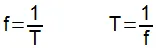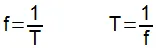

In [ ]:
# colocando em prática
# New features

# Passo 1 (P1) - colocar as datas em ordem cresente

aux  = df3.loc[:,['invoice_no', 'customer_id', 'invoice_date']].drop_duplicates().groupby(['customer_id','invoice_no'])#.sort_values('invoice_date', ascending = False)

auxr  = filtro.loc[:,['invoice_no', 'customer_id', 'invoice_date']].drop_duplicates().groupby(['customer_id','invoice_no'])#.sort_values('invoice_date', ascending = False)
                                      
# calcula o intervalo  

# média 
# desvio padrão
# inverte para encontrar frequência


In [ ]:
aux2 = df[['description','customer_id','invoice_date'] ].drop_duplicates() # Problema aqui é que canceladas também vem 
aux2[ aux2['description'] == 'WHITE HANGING HEART T-LIGHT HOLDER']
#(df1['customer_id'] == 17850) and 

In [ ]:
aux2 = df[['description','customer_id','invoice_date', 'invoice_no']].drop_duplicates() # Problema aqui é que canceladas também vem 
aux2[ aux2['description'] == 'WHITE HANGING HEART T-LIGHT HOLDER']
#(df1['customer_id'] == 17850) and 

In [ ]:
auxr1 = filtro.sort_values(by=['customer_id', 'invoice_date','invoice_no'], ascending=True)
auxr1 = auxr1[['customer_id','invoice_date', 'invoice_no']].drop_duplicates() 
# a coluna é invoice_no é importante para não deletar transações que foram feitas no mesmo dia do mesmo cara só que são diferentes. 
auxr2 = auxr1[['customer_id','invoice_date']]
auxr3 = auxr2.sort_values(by=['customer_id', 'invoice_date'], ascending=True).reset_index()
auxr3.drop(columns = 'index', axis = 1, inplace = True)



aux1 = df3.sort_values(by=['customer_id', 'invoice_date', 'invoice_no'], ascending=True)
aux1 = aux1[['customer_id','invoice_date', 'invoice_no']].drop_duplicates() 
aux2 = aux1[['customer_id','invoice_date']]
aux3 = aux2.sort_values(by=['customer_id', 'invoice_date'], ascending=True).reset_index()
aux3.drop(columns = 'index', axis = 1, inplace = True)
aux3.head(60)

In [ ]:
if aux3.loc[0, 'invoice_date'] == aux3.loc[1 , 'invoice_date']:
    print('são iguais')

In [ ]:
# calcula o intervalo 
#como é um pouco demorodo vou deixar comentado
#contador =  406828
#i = 0 
#while i < 406828:
    # vamos utilizar if para deixar o processo ficando mais leve e direto, n precisando entrar no dataset as vezes!
#    if aux3.loc[i,'customer_id'] == aux3.loc[i+1,'customer_id']: 
        
#        if aux3.loc[i+1, 'invoice_date'] != aux3.loc[i , 'invoice_date']:
            
#            aux3.loc[i,'interval'] = (aux3.loc[i+1,'invoice_date'] - aux3.loc[i,'invoice_date']).days
        
#        else:
#            aux3.loc[i,'interval'] = 0
#    else:
#        aux3.loc[i,'interval'] = 0
#    i = i+1
#for 
#aux2.loc[:'interval'] = aux['invoice_date'].apply(lambda x : ) 


In [ ]:
# Código otimizado pelo chat-gpt 3.5
aux4 = aux3#.drop(columns = 'interval', axis = 1)
mask = aux3['customer_id'] == aux3['customer_id'].shift(-1)

interval = (aux3['invoice_date'].shift(-1) - aux3['invoice_date']).dt.days
interval[~mask] = 0
interval[~mask | (aux3['invoice_date'] == aux3['invoice_date'].shift(-1))] = 0

aux4['interval'] = interval


# df_ref
# Código otimizado pelo chat-gpt 3.5
auxr4 = auxr3
mask = auxr3['customer_id'] == auxr3['customer_id'].shift(-1)

interval = (auxr3['invoice_date'].shift(-1) - auxr3['invoice_date']).dt.days
interval[~mask] = 0
interval[~mask | (auxr3['invoice_date'] == auxr3['invoice_date'].shift(-1))] = 0

auxr4['interval'] = interval

 Vamos esclarecer cada parte do código otimizado em detalhes:

1. Na linha 2, `shift(-1)`:
   - `shift(-1)` desloca os valores da série para baixo, com `-1` indicando que estamos deslocando as linhas uma posição para cima.
   - Isso compara se o `customer_id` atual é igual ao `customer_id` deslocado por uma posição para baixo na série de dados. Essa abordagem ajuda a identificar correspondências sequenciais de IDs de clientes.

2. Na linha 3, `interval = (aux3['invoice_date'].shift(-1) - aux3['invoice_date']).dt.days`:
   - Aqui, estamos calculando a diferença de dias entre a `invoice_date` atual e a `invoice_date` deslocada uma posição para baixo.
   - O uso de `shift(-1)` ajuda a obter a data subsequente à atual para calcular o intervalo de dias.

3. Na linha 4, `interval[~mask]`:
   - `~mask` é uma negação booleana, que retorna `True` para os valores onde 'mask' é False e vice-versa.
   - Portanto, `interval[~mask]` seleciona apenas as posições onde o `customer_id` não é igual ao `customer_id` da linha subsequente.

4. Na linha 5, `interval[~mask | (aux3['invoice_date'] == aux3['invoice_date'].shift(-1))] = 0`:
   - `|` é o operador OR bitwise, que atua sobre as máscaras booleanas, permitindo que a condição seja atendida se pelo menos uma das subcondições for verdadeira.
   - Aqui, estamos atribuindo 0 aos valores em `interval` que não satisfazem a condição da máscara ou quando as `invoice_date` atuais são iguais às datas deslocadas por uma posição para baixo.

5. Quanto à linha 6, não está realmente transformando tudo em um dataset. Ela simplesmente adiciona os valores calculados de `interval` ao DataFrame `aux3` na coluna 'interval'.

Espero que isso esclareça o funcionamento do código otimizado. Se tiver mais perguntas ou precisar de mais detalhes, fique à vontade para perguntar!   

## 4.1 Analise Univariada

### 4.2.1 Bivariate Analysis

O UMAP é uma técnica de aprendizado não supervisionado que tem sido amplamente utilizada para facilitar a visualização de dados complexos de alta dimensão, destacando tanto as estruturas locais quanto globais. É particularmente eficaz em contextos onde a preservação de distâncias entre pontos próximos é crucial, como em aplicações de clustering e classificação. É frequentemente preferido em relação a outras técnicas apenas por suas propriedades de preservar tanto a estrutura global quanto as relações locais nos dados.

In [ ]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)

#embedding
df_umap = pd.DataFrame()
df_umap['embedding_x'] = embedding[:, 0]
df_umap['embedding_y'] = embedding[:, 1]

#plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_umap)


Aqui, um objeto TSNE é criado com algumas configurações:

n_components=2: Isso especifica que o t-SNE irá reduzir os dados para duas dimensões, o que é comum para visualização.
n_jobs=-1: Essa configuração permite que todas as CPUs disponíveis sejam usadas para acelerar o processo de cálculo.
random_state=42: Define uma semente aleatória para garantir que o resultado seja reprodutível.

In [ ]:
reducer = mn.TSNE(n_components=2, n_jobs=-1, random_state=42) 
embedding = reducer.fit_transform(X)

#embedding
df_tsne = pd.DataFrame()
df_tsne['embedding_x'] = embedding[:, 0]
df_tsne['embedding_y'] = embedding[:, 1]

#plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_tsne)


O t-SNE é uma técnica de aprendizado não supervisionado que é especialmente útil para a visualização de dados complexos de alta dimensão. Ele funciona da seguinte maneira:

O t-SNE preserva as relações locais, o que significa que pontos que estão próximos uns dos outros em alta dimensão continuarão a estar próximos uns dos outros após a redução de dimensão.
O algoritmo se baseia em um modelo probabilístico: ele calcula a similaridade entre pontos em alta dimensão e tenta replicar essa distribuição em um espaço de baixa dimensão.
É particularmente útil em cenários como análise de clusters, onde se deseja ver como diferentes grupos de dados se comportam em um espaço reduzido, mas pode ser demorado e computacionalmente intensivo para conjuntos de dados muito grandes.

In [ ]:
X = df43.drop(columns=['gross_revenue'], axis=1)
y = df43['gross_revenue']

rf_model = en.RandomForestRegressor(n_estimators=100, random_state=42) #sao criadas 100 arvores 

rf_model.fit(X,y)

df_leaf = pd.DataFrame(rf_model.apply(X))

In [ ]:
df_leaf.head() 

In [ ]:
#reducer dimensionality
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_leaf)

#embedding
df_tree = pd.DataFrame()
df_tree['embedding_x'] = embedding[:, 0]
df_tree['embedding_y'] = embedding[:, 1]

#plot UMAP
sns.scatterplot(x = 'embedding_x', y = 'embedding_y', data = df_tree)

## 4.2 Creating of hypotheses

Embora a validação de hipóteses seja feito em Analise exploratória de dados, realizada aqui para aumentar familiariadade com dados 

### H1 - O país sede de origem do site é o que mais vende!

**TRUE**

In [ ]:
aux = df3.loc[:,['country', 'quantity']].groupby('country').sum().sort_values('quantity', ascending = False)


In [ ]:
aux = df3.loc[:,['country', 'quantity']].groupby('country').sum().sort_values('quantity', ascending = False)
sns.barplot(x = 'country', y = 'quantity', data = aux)

plt.xticks( rotation = 90)

plt.show()

In [ ]:
df3[['customer_id', 'country']].drop_duplicates().groupby('country').count().sort_values('customer_id',ascending = False )

In [ ]:
# Em porcentagem
df3['country'].value_counts(normalize = True).head()

### H2 - Qual produto que mais vende

In [ ]:
aux = df3.loc[df3['quantity']>= 0]
aux = aux.loc[:, ['stock_code', 'quantity']].groupby('stock_code').sum().sort_values('quantity', ascending = False)
aux

| Produto     | Description|    
|--------------|-----------|
|23843	|PAPER CRAFT , LITTLE BIRDIE|
|23166	|MEDIUM CERAMIC TOP STORAGE JAR|
|84077	|WORLD WAR 2 GLIDERS ASSTD DESIGNS|
|22197	|SMALL POPCORN HOLDER|	
|85099B	|JUMBO BAG RED RETROSPOT|


### H3 - De qual país é o cliente que mais compra

**o Cliente que mais compra é da United Kingdom**

In [ ]:
df3.head()

In [ ]:
aux = df3.loc[:,['country', 'customer_id', 'quantity']].groupby(['country', 'customer_id']).count().sort_values('quantity', ascending = False)
aux

### H4 - Qual os dois meses do ano que mais vende ?

1. Novembro
2. Outubro
3. Setembro

In [ ]:
# 2016

df7 = df3
# Converta a coluna 'Timestamp' para o formato datetime
df7['invoice_date'] = pd.to_datetime(df3['invoice_date'])

# Crie um filtro para selecionar os valores antes de 2017
filtro = df7[df7['invoice_date'].dt.year != 2017]
#filtro['invoice_date'].unique()
aux =  filtro.loc[:,['month', 'quantity']].groupby('month').sum().sort_values('quantity', ascending = False)
aux.head(15)

In [ ]:
# 2017

df7 = df3
# Converta a coluna 'Timestamp' para o formato datetime
df7['invoice_date'] = pd.to_datetime(df3['invoice_date'])

# Crie um filtro para selecionar os valores antes de 2017
filtro = df7[df7['invoice_date'].dt.year == 2017]
filtro
aux =  filtro.loc[:,['month', 'quantity']].groupby('month').sum().sort_values('quantity', ascending = False)
aux.head(15)

### H5 - Qual o periodo do ano que menos vende?
1. Dezembro
2. Fevereiro
3. Abril

In [ ]:
# 2016

df7 = df3
# Converta a coluna 'Timestamp' para o formato datetime
df7['invoice_date'] = pd.to_datetime(df3['invoice_date'])

# Crie um filtro para selecionar os valores antes de 2017
filtro = df7[df7['invoice_date'].dt.year != 2017]
filtro['invoice_date'].unique()
#aux =  filtro.loc[:,['month', 'quantity']].groupby('month').sum().sort_values('quantity', ascending = False)
#aux.head(15)

In [ ]:
# 2017
df7 = df3

# Converta a coluna 'Timestamp' para o formato datetime
df7['invoice_date'] = pd.to_datetime(df3['invoice_date'])

# Crie um filtro para selecionar os valores antes de 2017
# Seria interressante agrupar por mês
filtro = df3[df3['invoice_date'].dt.year > 2016]
filtro
aux =  filtro.loc[:,['month', 'quantity']].groupby('month').sum().sort_values('quantity', ascending = False)
aux.head(15)

In [ ]:
X = df_tree.copy()


In [ ]:
X.head()

In [ ]:
clusters = np.arange(2,25,1)

## 7.1 K-Means

In [ ]:
from sklearn            import metrics          as m
from sklearn.metrics    import silhouette_score
kmeans_list = []
# c -/> cluster
# m -> metrics
for k in clusters:
    #model definition
    kmeans_model = c.KMeans(n_clusters=k, n_init = 100, random_state=42)

    #model training
    kmeans_model.fit(X)

    #model predict
    labels = kmeans_model.predict(X)

    #model performance 
    sil = m.silhouette_score(X, labels, metric = 'euclidean')
    kmeans_list.append(sil)



Claro! O **silhouette score** e outras métricas são fundamentais para avaliar a qualidade de um agrupamento em algoritmos de clustering, como o KMeans. Aqui estão algumas definições e descrições de várias métricas de desempenho de cluster:

### 1. Silhouette Score
- **Definição**: O silhouette score mede a qualidade de um agrupamento, levando em conta a distância entre os pontos dentro do mesmo cluster e a distância entre pontos de clusters diferentes.
- **Intervalo**: O valor varia de -1 a +1. Um valor próximo de +1 indica que os pontos estão bem agrupados e distantes de outros clusters, enquanto valores próximos de zero indicam que os clusters estão sobrepostos. Valores negativos sugerem que os pontos podem estar agrupados incorretamente.

### 2. Davies-Bouldin Index
- **Definição**: O Davies-Bouldin Index mede a média das razões entre a soma das distâncias dos pontos a seus respectivos centróides e as distâncias entre os centróides dos clusters.
- **Objetivo**: Um índice menor sugere uma melhor separação entre os clusters, enquanto valores maiores indicam que os clusters se sobrepõem.

### 3. Dunn Index
- **Definição**: O Dunn Index define a relação entre a menor distância entre os pontos de diferentes clusters e a maior distância dentro de um cluster.
- **Objetivo**: Um valor maior do Dunn Index indica uma boa separação entre clusters e compactação dentro deles.

### 4. Calinski-Harabasz Index (ou Variância de Dunn)
- **Definição**: O Calinski-Harabasz Index, também conhecido como Índice de Variância, é a razão entre a soma das variâncias entre clusters e a soma das variâncias dentro dos clusters.
- **Objetivo**: Quanto maior o valor, melhor a densidade e a separação dos clusters.

### 5. Inertia (ou Within-cluster Sum of Squares)
- **Definição**: Esta métrica mede a soma das distâncias quadráticas entre cada ponto em um cluster e o centróide desse cluster.
- **Objetivo**: Um valor menor indica que os pontos estão mais próximos do centróide do cluster, sinalizando um melhor agrupamento. É frequentemente usada no contexto do algoritmo KMeans.

### 6. Adjusted Rand Index (ARI)
- **Definição**: O ARI é uma medida de similaridade entre dois agrupamentos (um real e um predito), que corrige o Rand Index para o acaso.
- **Intervalo**: Os valores podem variar de -1 a 1, onde 1 indica que os agrupamentos são idênticos, 0 indica que não há concordância além daquela esperada pelo acaso, e valores negativos indicam que há menos concordância do que o esperado.

### 7. Fowlkes-Mallows Index
- **Definição**: Essa é uma medida que calcula a média geométrica da precisão e do recall entre as classes preditas e verdadeiras.
- **Objetivo**: Um valor mais alto indica uma melhor concordância entre os agrupamentos.

Essas métricas podem ser usadas em conjunto para obter uma avaliação abrangente da qualidade de seus clusters. Dependendo do seu conjunto de dados e do tipo de problema, algumas métricas podem ser mais informativas do que outras. 

In [ ]:
plt.plot(clusters, kmeans_list, linestyle='--', marker='o', color='b')
plt.xlabel('Values of K')
plt.ylabel('Silhouete Score')
plt.axvline(x=17, color='g', linestyle='--')
plt.title('Silhouete Score vs K')

## 7.2 GMM

In [ ]:
gmm_list = []

for k in clusters:
    #model definition
    gmm_model = mx.GaussianMixture(n_components=k, random_state=42)  #define quantas guassianas eu quero


    #model training
    gmm_model.fit(X)

    #model predict
    labels = gmm_model.predict(X)

    #model performance 
    sil = m.silhouette_score(X, labels, metric='euclidean')
    gmm_list.append(sil)

In [ ]:
plt.plot(clusters, gmm_list, linestyle='--', marker='o', color='b')
plt.xlabel('Values of K')
plt.ylabel('Silhouete Score')
plt.axvline(x=16, color='g', linestyle='--')

plt.title('Silhouete Score vs K')

## 7.3 Hierarchical Clustering

In [ ]:
#model deinition and training
hc_model = hc.linkage(X,'ward')

In [ ]:
#hc.dendrogram( hc_model, leaf_rotation=90, leaf_font_size=8)
#plt.plot()

In [ ]:
hc_list = []
for k in clusters:
    #model definition and training
    hc_model = hc.linkage(X,'ward')
    
    #model predict
    labels = hc.fcluster(hc_model, k, criterion='maxclust')
    
    #metrics
    sil = m.silhouette_score(X, labels, metric='euclidean')
    hc_list.append(sil)

In [ ]:
plt.plot(clusters, hc_list, linestyle='--', marker='o', color='b')
plt.ylabel('Silhouete Score')
plt.axvline(x=1, color='g', linestyle='--')

plt.title('Silhouete Score vs K')

## 7.5 Results

In [ ]:
df_results = pd.DataFrame({'KMeans': kmeans_list, 'GMM': gmm_list, 'HC': hc_list}).T
df_results.columns = clusters
df_results.style.highlight_max(color='lightgreen', axis=1)


In [ ]:
import matplotlib.pyplot as plt

# Supondo que clusters, hc_list, kmeans_list e gmm_list já estejam definidos e preenchidos

plt.figure()

# Adicionando legendas para cada plot usando o parâmetro 'label'
plt.plot(clusters, hc_list, linestyle='--', marker='o', color='b', label='Hierarchical Clustering')
plt.plot(clusters, kmeans_list, linestyle='--', marker='o', color='r', label='KMeans')
plt.plot(clusters, gmm_list, linestyle='--', marker='o', color='g', label='Gaussian Mixture Model')

# Criação da legenda com os rótulos definidos
plt.legend()

# Exibindo o gráfico
plt.show()


In [ ]:
#model definition
k = 13
#kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

#model trainning
#kmeans.fit(X)


hc_model = hc.linkage(X,'ward')
    
    #model predict
labels = hc.fcluster(hc_model, k, criterion='maxclust')

#clustering
#labels = kmeans.labels_
#labels = kmeans.fit_predict(X) #tirar o fit de cima


## 7.2 Cluster Validation

In [ ]:
#SS
print('SS value: {}'.format(m.silhouette_score(X, labels, metric='euclidean')))

## 8.0 Cluster Analysis

In [ ]:
df9 = X.copy()
df9['cluster'] = labels
df9.head()

##  8.1 Visualization Inspection

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='embedding_x', y='embedding_y', hue='cluster', data=df9, palette='deep');


## 8.2 Cluster Profile

In [ ]:
df4.head()

In [ ]:
aux = df4.sort_values('gross_revenue', ascending = False)
aux['cluster'] = labels
aux.head(10)

In [ ]:
#Number customer
df_cluster = df92.groupby('cluster').customer_id.count().reset_index()
df_cluster['perc_customer'] = 100*(df_cluster['customer_id'] / df_cluster['customer_id'].sum())

#Avg Gross Revenue
df_avg_gross_revenue = df92.groupby('cluster').gross_revenue.mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how='inner', on='cluster')

#Avg Recency Days
df_avg_recency_days = df92.groupby('cluster').recency_days.mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how='inner', on='cluster')

#Avg invoice_no
df_qtde_products = df92.groupby('cluster').variety_products.mean().reset_index()
df_cluster = pd.merge(df_cluster, df_qtde_products, how='inner', on='cluster')

# Interval_mean
df_frequency = df92.groupby('cluster').interval_mean.mean().reset_index()
df_cluster = pd.merge(df_cluster, df_frequency, how='inner', on='cluster')

#Frequency
df_frequency = df92.groupby('cluster').frequency.mean().reset_index()
df_cluster = pd.merge(df_cluster, df_frequency, how='inner', on='cluster')

#Returns
df_qtde_returns = df92.groupby('cluster').qtde_returns.mean().reset_index()
df_cluster = pd.merge(df_cluster, df_qtde_returns, how='inner', on='cluster')


df_cluster.sort_values('gross_revenue', ascending=False)

## 10.0 EDA

In [ ]:
df10 = df92

### H1. Os clientes do cluster insiders possuem um volume de compra de produtos acima de 10% do totatl de compras

verdadeiro: O cluster insider possui um volume de compra de 50%

In [ ]:
#df10[df10['cluster'] ==1].groupby('cluster').qtde_products.sum().reset_index()
    
#sum the quantity of products of insiders
df_sales_insiders = df10[df10['cluster'] == 12].variety_products.sum() #substituir depois o cluster correspondente ao insiders
df_sales_total = df10.variety_products.sum()

#percentage of sales of insiders by the total product sales
print('% Sales Insiders: {:.2f}'.format(100*df_sales_insiders/df_sales_total))


### H2. Os clientes do cluster insiders possuem um volume de faturamento de compras acima de 10% do total de compras

verdadeiro: O cluster insider possui um volume de gmv de 40,60%


In [ ]:
#sum the gmv of insiders
df_gmv_insiders = df10[df10['cluster'] == 12].gross_revenue.sum() #substituir depois o cluster correspondente ao insiders
df_gmv_total = df10.gross_revenue.sum()

#percentage of sales of insiders by the tot/al product sales
print('% Sales Insiders: {:.2f}'.format(100*df_gmv_insiders/df_gmv_total))


### H3. Os clientes do cluster insiders tem numero de devolução médio abaixo do media da base total de clientes

Falso: O cluster insiders tem a média de devolução acima da média geral


In [ ]:
df_avg_return_insiders = df10[df10['cluster'] == 12].qtde_returns.mean()
df_avg_return_total = df10.qtde_returns.mean()

print('Avg Return insiders: {} vs Avg Returns total: {}'.format(np.round(df_avg_return_insiders, 0),
                                                               np.round(df_avg_return_total, 0)))




### H4. A mediana do faturamento pelos clientes do cluster insider é 10% do que a mediana do faturamento geral

verdadeiro: A mediana do faturamento é 836.17% acima da mediana


In [ ]:
#mediana de gmv do insiders
df_median_gmv_insiders = df10[df10['cluster'] == 12].gross_revenue.median()

#mediana de gmv do total
df_median_gmv_total = df10.gross_revenue.median()

gmv_diff = (df_median_gmv_insiders - df_median_gmv_total) / df_median_gmv_total
print('Median Diff: {:.2f}%'.format(100*gmv_diff))



### H5. O GMV dos clientes insiders está concentradas no 3 quartil

Falso: O faturamento do cluster insiders esta concentrada no quartil 1


In [ ]:
np.percentile(df10[df10['cluster'] == 12].gross_revenue, q=0.1)

In [ ]:
np.percentile(df10[df10['cluster'] == 12].gross_revenue, q=0.9)

In [ ]:
df_aux = (df10[(df10['cluster'] == 12) & 
               (df10['gross_revenue'] < 10000)]
               .gross_revenue)
sns.boxplot(x=df_aux)

In [ ]:

df_aux = (df10[(df10['cluster'] == 12) &
               (df10['gross_revenue'] < 10000)]
               .gross_revenue)
sns.violinplot(x=df_aux)

In [ ]:
aux = df10.groupby('cluster').mean().sort_values('gross_revenue', ascending = False)
aux